# Projet P5 OC Data Scientist: Segmentez des clients d'un site e-commerce

# 1. Problématique

La plateforme de e-commerce brésilienne Olist souhaite utiliser l'intelligence artificielle pour classer automatiquement les clients en catégories, c'est-à-dire faire de la segmentation de la clientèle.

L'objectif commercial est d'identifier les types d'utilisateurs en fonction de leurs données personnelles et de leur comportement d'achat.

L'apprentissage automatique non supervisé devrait fournir de meilleurs résultats que les méthodes traditionnelles telles que l'analyse récence-fréquence-valeur monétaire (RFM).

Objectifs attendus pour ce projet :

- offrir à l'équipe marketing d'Olist une visualisation simple de la sortie de l'algorithme de classification d'apprentissage automatique (ML).

- estimer la durée du pipeline de classification ML et proposer à Olist un contrat de maintenance raisonnable.

Les données sont fournies sous la forme d'un ensemble de données Olist de la société de commerce électronique brésilienne (https://www.kaggle.com/olistbr/brazilian-ecommerce) avec 9 fichiers csv. Ces feuilles de calcul peuvent être combinées dans un cadre de données Pandas pour extraire des informations pertinentes.

# 2. Mise en place environnement et importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
from collections import Counter
from math import radians, cos, sin, asin, sqrt

pd.options.mode.chained_assignment = None  # default='warn'

# Versions des librairies
print("Version librairie pandas: " + pd.__version__)
print("Version librairie numpy: " + np.__version__)
print("Version librairie matplotlib: " + matplotlib.__version__)
print("Version librairie seaborn: " + sns.__version__)

Version librairie pandas: 1.1.3
Version librairie numpy: 1.19.2
Version librairie matplotlib: 3.3.2
Version librairie seaborn: 0.11.0


# 3. Fonctions

In [2]:
# Fonction pour supprimer les doublons de lignes dans une dataframe
def drop_doublons_df(df_in):
    
    # Création d'une variable indiquant la présence de lignes dupliquées dans la dataframe
    nbre_lignes_dupliq_av = df_in[df_in.duplicated(keep=False)] 
    
    print("Liste des lignes dupliquées pour chaque colonne de la dataframe :")
    print(nbre_lignes_dupliq_av)
    
    # Suppression des valeurs dupliquées
    df_in = df_in.drop_duplicates(keep=False)
    
    # Création d'une variable indiquant la présence de lignes dupliquées dans la dataframe
    nbre_lignes_dupliq_ap = df_in[df_in.duplicated(keep=False)] 

    return nbre_lignes_dupliq_ap

In [3]:
# Fonction qui construit un dataframe indiquant le pourcentage de données disponibles par colonne du dataset
def desc_data_dispo (df_in):
    df_desc_rempl=pd.DataFrame(index=['nbre valeurs manquantes', 'nbre de valeurs dispo.','taux remplissage'],
                               columns=df_in.columns)
    for col in df_in.columns:
        nb_nan = df_in[col].isnull().sum()
        df_desc_rempl.loc['nbre valeurs manquantes',col] = nb_nan              
        df_desc_rempl.loc['nbre de valeurs dispo.', col]= df_in.shape[0]-nb_nan 
        df_desc_rempl.loc['taux remplissage', col]=round((df_in.shape[0]-nb_nan)/(df_in.shape[0]*1.0)*100,2)
        
    return df_desc_rempl

In [4]:
# Fonction qui affiche les données de la dataframe des données disponibles dans la dataset, sous forme d'histogramme
def affich_taux_dispo (df_in, larg, haut):
    # Affichage des taux de remplissage par colonnes du datatest
    dict = {'variable' : df_in.columns,\
        'taux remplissage': df_in.loc['taux remplissage', df_in.columns],\
        'taux de Nan': 100 - df_in.loc['taux remplissage',df_in.columns]}

    df_grah_dispo = pd.DataFrame(dict)
    df_grah_dispo.reset_index(drop=True, inplace=True)
    df_grah_dispo = df_grah_dispo.sort_values(by='taux remplissage', ascending=False)

    barWidth=3
    plt.figure(figsize=(larg,haut))
    plt.gca().invert_yaxis()

    plt.barh(df_grah_dispo['variable'], df_grah_dispo['taux remplissage'], color='#a3acff')
    plt.barh(df_grah_dispo['variable'], df_grah_dispo['taux de Nan'], left=df_grah_dispo['taux remplissage'], color ='#b5ffb9')
    plt.title('Représentation du remplissage des données', fontsize=20)
    plt.yticks(fontsize=16)
    plt.xticks([0,20,50,80,95,96,97,98,99,100])
    plt.ylabel('Variable', fontdict={'fontsize' : 16})
    plt.xlabel('Taux de remplissage en %', fontdict={'fontsize' : 16})

    plt.axvline(x=80, color='b')
    plt.text(82, -1, '>80%', color='b')
    plt.axvline(x=20, color='r')
    plt.text(12, -1, '<20%', color='r')
    plt.grid(True)
    plt.show()
    return None

In [5]:
# Fonction qui renvoie la proportion de NaN sur l'ensemble du dataset
def print_proportion_nan(df_in):
    print('Proportion de NaN : {} %, Taille du jeu de données : {}\n'
        .format(round((df_in.isna().sum().sum()/(df_in.shape[0]*df_in.shape[1]))*100,2),
        df_in.shape))
    return None

In [6]:
# Fonction pour le traitement de valeurs NaN pour les valeurs numériques
def traite_nan_num(df_in):
    # Imputation des valeurs NaN avec la valeur 1 pour la variable "nb_payment_sequential"
    print('------ Imputation valeur 1 si présence valeurs NaN pour variable "nb_payment_sequential" ------')
    df_in[['nb_payment_sequential']] = df_in[['nb_payment_sequential']].fillna(1)
    
    print('------ Dataset suite imputation valeur 1 si présence valeurs NaN pour variable "nb_payment_sequential" ------')
    print_proportion_nan(df_in)
   
    # Imputation des valeurs NaN avec la valeur 1 pour la variable "sum_payment_installments"
    print('------ Imputation valeur 1 si présence valeurs NaN pour variable "sum_payment_installments" ------')
    df_in[['sum_payment_installments']] = df_in[['sum_payment_installments']].fillna(1)
    
    print('------ Dataset suite imputation valeur 1 si présence valeurs NaN pour variable "sum_payment_installments" ------')
    print_proportion_nan(df_in)

    return df_in

In [7]:
# Fonction pour le traitement de valeurs NaN pour les valeurs datetime
def traite_nan_datetime(df_in):
    # Suppression des valeurs NaN pour la variable "order_delivered_customer_date"
    print('------ Suppression des valeurs NaN pour variable "order_delivered_customer_date" ------')
    df_in.dropna(subset=['order_delivered_customer_date'], axis=0, inplace=True)  
    
    print('------ Dataset suite suppression valeurs NaN pour variable "order_delivered_customer_date" ------')
    print_proportion_nan(df_in)      
    
    return df_in

In [8]:
# Fonction pour le traitement de valeurs NaN pour les valeurs qualitatives
def traite_nan_object(df_in):
    # Imputation des valeurs NaN avec la valeur 'other' pour la variable "product_category_name"
    print('------ Imputation valeur "other" si présence valeurs NaN pour variable "product_category_name" ------')
    df_in[['product_category_name']] = df_in[['product_category_name']].fillna('other')  
    
    print('------ Dataset suite imputation valeur 1 si présence valeurs NaN pour variable "product_category_name" ------')
    print_proportion_nan(df_in)      
    
    return df_in

In [9]:
# Fonction qui affiche un récapitulatif des outliers pour les variables quantitatives sous forme d'un tableau
def desc_outliers_df(df_in):
    val_num = ['number']
    df_num = df_in.select_dtypes(include=val_num)
    
    print(' ------ Traitement de outliers: liste des colonnes quantitatives à traiter ------')
    print(df_num.columns)
    
    # Création dataframe des récapitulatifs des outliers des nutriments et des scores
    list_index = []
    df_outlier_recap = pd.DataFrame(index=list_index, columns=['Min','Max','Nbre > 0','Nbre < 0'])
    
    for col in df_num.columns:
        list_index.append(col)
        
        # Valeur min
        min = df_in[col].min()
        
        # Valeur max
        max =  df_in[col].max()
        
        # Nombre de valeur < 0
        nbre_inf_0 = df_in[df_in[col] < 0].count()[[col]]
        
        # Nombre valeurs >= 0
        nbre_sup_eq_0 = df_in[df_in[col] >= 0].count()[[col]]
                        
        # Constitution de tableau récapitulatif des outliers
        df_outlier_recap.loc[col] = [min ,max, nbre_sup_eq_0.loc[col], nbre_inf_0.loc[col]]    
           
    
    print('')
    df_recap_outliers = df_outlier_recap
        
    return df_recap_outliers

In [10]:
# Fonction pour traiter les valeurs aberrantes pour les variables numériques
def traite_outliers_num(df_in):
    print('----- Remplacement des valeurs 0 par la valeur 1 pour la variable "mean_payment_installments" ------')
    df_in['mean_payment_installments'].replace({0: 1}, inplace=True)
          
    print('------ Dataset suite traitement outliers pour variable "mean_payment_installments" ------')
    print_proportion_nan(df_in)            
    
    return df_in

In [11]:
# Fonction pour l'affichage des diagrammes des distributions / boxplots - analyse univariée (variables continues/discretes)
def affich_histplot_boxplot(df_in, col_a_afficher, titre_graph_1, titre_graph_2, titre_graph_3, nb_bin, kde, discrete):
    fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(20,20))
    
    mediane_prop = {'color':"black"}
    moyenne_prop = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

    # Affichage histplot de distribution
    sns.histplot(data=df_in, x=col_a_afficher, ax=axes[0], color="blue", discrete=discrete, kde=kde, bins=nb_bin)
    axes[0].set_title(titre_graph_1, color="blue", fontsize=16)
    axes[0].set_xlabel(col_a_afficher, fontsize=14)
    axes[0].set_ylabel('Nombre', fontsize=14)

    # Affichage boxplot (avec outiers)
    sns.boxplot(data=df_in, x=col_a_afficher, ax=axes[1], color="blue", medianprops=mediane_prop,\
                showmeans=True,
                showfliers=True,     
                meanprops=moyenne_prop)
    axes[1].set_title(titre_graph_2, color="blue", fontsize=16)
    axes[1].set_xlabel(col_a_afficher, fontsize=14)
    axes[1].set_ylabel('Distribution', fontsize=14)
    
     # Affichage boxplot (sans outiers)
    sns.boxplot(data=df_in, x=col_a_afficher, ax=axes[2], color="blue", medianprops=mediane_prop,\
                showmeans=True,
                showfliers=False,     
                meanprops=moyenne_prop)
    axes[2].set_title(titre_graph_3, color="blue", fontsize=16)
    axes[2].set_xlabel(col_a_afficher, fontsize=14)
    axes[2].set_ylabel('Distribution', fontsize=14)

    plt.show()
    
    return None

In [12]:
# Fonction pour l'affichage des diagrammes des distributions pour les catégories produit
def affich_histplot_catprod(df_in, var_line1, var_line2, var_line3, var_line4, 
                            var_line5, titre_graph_1, nb_bin, kde, discrete):
    
    def affich_ligne_subplot(df_in, var_line, nb_bin, kde, discrete, num_ligne):
        # Initialisation du compteur liste variables
        i=0
        
        for var in var_line:
            sns.histplot(data=df_in, x=var, ax=axes[num_ligne,i], color="blue", bins=nb_bin, kde=kde, discrete=discrete)
            axes[num_ligne,i].set_xlabel(var + ' (en % du nbre articles achetés)', fontsize=10)
            axes[num_ligne,i].set_ylabel('Nombre', fontsize=10)
            i=+1
            
        return None
    
    
    fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(20,20))
    plt.setp(axes, xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9, 1], 
                    xticklabels=['0%','10%','20%','30%','40%','50%','60%','70%','80%','90%','100%'],
                    yticks=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
    plt.suptitle(titre_graph_1, fontsize=18, color="blue")

    
    # Affichage histplot - 1ère ligne
    affich_ligne_subplot(df_in, var_line1, nb_bin, kde, discrete, 0)
    
    # Affichage histplot - 2ème ligne
    affich_ligne_subplot(df_in, var_line2, nb_bin, kde, discrete, 1)
    
    # Affichage histplot - 3ème ligne
    affich_ligne_subplot(df_in, var_line3, nb_bin, kde, discrete, 2)
    
    # Affichage histplot - 4ème ligne
    affich_ligne_subplot(df_in, var_line4, nb_bin, kde, discrete, 3)
    
    # Affichage histplot - 5ème ligne
    affich_ligne_subplot(df_in, var_line5, nb_bin, kde, discrete, 4)
    
    plt.show()
    
    return None

In [13]:
# Fonction pour la détection des valeurs atypiques par la méthode des inter-quartiles
def detect_outliers_iqr(df_in, n, var):
    
    outlier_indices = []

    # Boucle sur la liste des colonnes
    for col in var:
        # 1er quartile (25%)
        Q1 = np.percentile(df_in[col], 25)
        # 3ème quartile (75%)
        Q3 = np.percentile(df_in[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 8 * IQR

        # Traitement de valeurs atypiques
        outlier_list_col = df_in[(df_in[col] < Q1 - outlier_step) | (df_in[col] > Q3 + outlier_step)].index

        # Liste des indices des valeurs atypiques
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 1 outlier
    outlier_indices = Counter(outlier_indices)        
  

    return outlier_indices

In [14]:
# Fonction pour découper une variable de type datetime en
# Création variables:
# - Année: variable prefix_col_year
# - Numéro du mois: variable prefix_col_month
# - Numéro de jour dans la semaine: variable prefix_col_dayofweek
# - Heure: variable prefix_col_hour
# - Jour de la semaine: variable prefix_col_day
# - Mois: variable prefix_col_mon
def decoupe_var_datetime(df_in, prefix_col, col_datetime):
    df_in[prefix_col+'_year'] = df_in[col_datetime].apply(lambda x: x.year)
    df_in[prefix_col+'_month'] = df_in[col_datetime].apply(lambda x: x.month)
    df_in[prefix_col+'_dayofweek'] = df_in[col_datetime].apply(lambda x: x.dayofweek)
    df_in[prefix_col+'_hour'] = df_in[col_datetime].apply(lambda x: x.hour)
    df_in[prefix_col+'_day'] = df_in[prefix_col+'_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
    df_in[prefix_col+'_mon'] = df_in[col_datetime].apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',
                                                                                 4:'Apr',5:'May',6:'Jun',
                                                                                 7:'Jul',8:'Aug',9:'Sep',
                                                                                 10:'Oct',11:'Nov',12:'Dec'})
    return df_in

In [15]:
# Fonction pour calcul distance haversine
def distance_haversine(lat1, lng1, lat2, lng2, degrees=True):
    
    # Rayon de la Terre en miles
    r = 3956 
  
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    distance = 2 * r * asin(sqrt(a))  

    return distance

# 4. Chargement et description des données

## 4.1 Chargement des données des différentes tables

In [16]:
# Chargement des données
# Commandes
df_orders = pd.read_csv('./input/olist_orders_dataset.csv',sep=',', 
                        parse_dates=['order_purchase_timestamp', 
                                     'order_estimated_delivery_date', 'order_delivered_customer_date'])
# Clients
df_customers = pd.read_csv('./input/olist_customers_dataset.csv',sep=',')

# Paiements
df_payments = pd.read_csv('./input/olist_order_payments_dataset.csv',sep=',')

# Revues
df_reviews = pd.read_csv('./input/olist_order_reviews_dataset.csv',sep=',')

# Geolocalisation
df_geolocation = pd.read_csv('./input/olist_geolocation_dataset.csv', sep=',')

# Articles
df_items = pd.read_csv('./input/olist_order_items_dataset.csv',sep=',')

# Produits
df_products = pd.read_csv('./input/olist_products_dataset.csv',sep=',')

# Dénomination des produits
df_products_categ = pd.read_csv('./input/product_category_name_translation.csv',sep=',')

# Revendeurs
df_sellers= pd.read_csv('./input/olist_sellers_dataset.csv',sep=',')

## 4.2 Description des tables

### 4.2.1 Table des commandes client

In [17]:
# Table Orders
df_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


Ce fichier regroupe les entêtes de commandes, identifiées par un order_id unique et rattaché à un client par le customer_id.

In [18]:
# Description table Orders
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(5)
memory usage: 6.1+ MB


### 4.2.2 Table des clients

In [19]:
# Table Customers
df_customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Les variables importantes du dataset :

- customer_id : Clé dans le dataset des commandes
- customer_unique_id : Identifiant unique du client
- customer_state : Etat du client

In [20]:
# Description table Customers
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Il n'y a pas de valeurs nulles dans ce dataset.

### 4.2.3 Table des paiements

In [21]:
# Table Payments
df_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Variables importantes du dataset:
- payment_sequential : Si plusieurs méthodes de paiement appliquées, une ligne est crée par moyen utilisé.
- payment_installments : Nombre de versements choisis.
- payment_type : type de paiement (carte de crédit,...)

In [22]:
# Description table Payments
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Il n'y a pas de valeurs nulles dans ce dataset.

### 4.2.4 Table des avis client liés à une commande

In [23]:
# Table Reviews
df_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


Ce dataset porte sur les avis clients liés à une commande. Il comporte une note (review_score) et un commentaire.

In [24]:
# Description table Reviews
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### 4.2.5 Table des données de géolocalisation

In [25]:
# Table Geolocalisation
df_geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


Ce fichier est lié au fichier clients grâce à la clé geolocation_zip_code_prefix.

In [26]:
# Description table Geolocalisation
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Il n'y a pas de valeurs nulles dans ce dataset.

### 4.2.6 Table des lignes de commande

In [27]:
# Table Items
df_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Variables importantes du dataset regroupant les lignes de commande :

- order_id : Identifiant unique de la commande
- order_item_id : Identifiant séquentiel des items d'une même commande (lignes de commande)
- product_id : Identifiant unique du produit
- seller_id : Identifiant unique du vendeur
- price : Prix de la ligne de commande
- freight_value : Coût de fret de la ligne (Si plusieurs lignes, le coût de fret est réparti entre toutes les lignes)

In [28]:
# Description Table Items
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Il n'y a pas de valeurs nulles pour ce dataset.

### 4.2.7 Table des produits

In [29]:
# Table Products
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


Ce dataset regroupe les catégories de produits ainsi que diverses caractéristiques de dimensions et poids.

In [30]:
# Description table Products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### 4.2.8 Table des catégories de produit

In [31]:
# Table Product_translations
df_products_categ.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


Les catégories traduites et les produits sont liés par la variable product_category_name.

In [32]:
# Description table Product_translations
df_products_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Il n'y a pas de valeurs nulles dans ce dataset. 

### 4.2.9 Tables des revendeurs

In [33]:
# Table Sellers
df_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


Ce dataset fournit des informations sur la localisation des revendeurs.

In [34]:
# Description table Sellers
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


il n'y a pas de valeurs nulles pour ce dataset

# 5. Constitution du jeu de données

## 5.1 Modèle de données

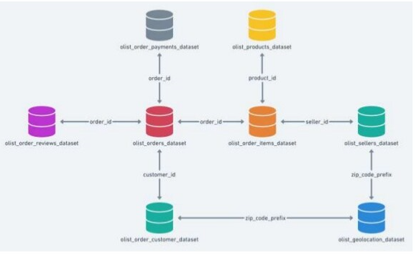

Les données furnies par OLIST sont réparties dans plusieurs tables:
- les tables CLIENTS:
    - Customers
    - Geolocalisation
    
- les tables COMMANDES:
    - Orders
    - Order_items
    - Order_payments
    - Order_reviews
    
- les tables PRODUITS:
     - Products
     - Categories_en

## 5.2 Création d'un dataset étendu unique

Création d'un dataset unique par fusion des tables "Commandes", "Lignes de commande", "Paiements", "Avis client", "Clients", "Produits" et "Catégories produit".

Les 2 tables "Géolocalisation" et "Revendeurs" ne sont pas utilisées. 

### 5.2.1 Merge des tables "Produits" et "Catégories produit"

In [35]:
# Merge des tables "Produits et "Catégories Produit" 
df_products = pd.merge(df_products, df_products_categ,
                    how="left",
                    on="product_category_name")

# Liste des variables à supprimer et suppression des variables dans les 2 tables fusionnées
del_features_list = ["product_category_name", "product_name_lenght", "product_description_lenght", "product_photos_qty",
                     "product_weight_g",
                     "product_length_cm", "product_height_cm",
                     "product_width_cm"]
df_products.drop(del_features_list, axis=1, inplace=True)

# Renommage de la colonne product_category_name_english" en "product_category_name"
df_products = df_products.rename(columns={"product_category_name_english":
                                    "product_category_name"})
df_products.head(3)

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure


In [36]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32328 non-null  object
dtypes: object(2)
memory usage: 772.3+ KB


### 5.2.2 Merge des tables "Commandes et "Lignes de commande"

In [37]:
# Merge des tables "Commandes" et "Lignes de commande"
df_items = pd.merge(df_items, df_orders,
                       how="left",
                       on="order_id")

# Liste des variables à supprimer et suppression des variables dans les 2 tables fusionnées
del_features_list = ["seller_id", "shipping_limit_date",
                     "order_approved_at",
                     "order_delivered_carrier_date",
                     "order_estimated_delivery_date"]
df_items.drop(del_features_list,
                 axis=1,
                 inplace=True)

df_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16


In [38]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   price                          112650 non-null  float64       
 4   freight_value                  112650 non-null  float64       
 5   customer_id                    112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_delivered_customer_date  110196 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.6+ MB


### 5.2.3 Conservation uniquement des commandes ayant été traitées et livrées

On écarte les commandes qui sont traitées et livrées, par conséquent, on garde uniquement les commandes avec status = 'delivered'.

In [39]:
# Affichage des différents statuts de commande
df_items.groupby(by="order_status").sum()["order_item_id"]

order_status
approved            4
canceled          704
delivered      132036
invoiced          435
processing        455
shipped          1294
unavailable         8
Name: order_item_id, dtype: int64

In [40]:
# On garde uniquement les ordres de commande de type 'delivered'
df_items = df_items[df_items["order_status"] == "delivered"]

In [41]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 8.4+ MB


### 5.2.4 Découpage de la variable "order_purchase_date" en jour, mois, année, heure

In [42]:
df_items = decoupe_var_datetime(df_items, 'order_purchase', 'order_purchase_timestamp')
df_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017,9,2,8,Wed,Sep
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017,4,2,10,Wed,Apr
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018,1,6,14,Sun,Jan


### 5.2.5 Merge des tables "Paiements" et "Commandes Lignes de commande" - Feature engineering

Ajout de 2 variables sur les paiements en regroupant les informations de la table des paiements.

Création des 2 variables suivantes:
- le nombre de moyens de paiement différents utilisés sur la commande.
- le nombre d'échéances totales de la commande.

In [43]:
# Création de 2 nouvelles variables en groupant les données de la table "Paiements"
group_payments = df_payments.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})

# Merge des tables "Paiements" et "Commandes / Lignes de commande"
df_items = pd.merge(df_items, group_payments,
                       how="left",
                       on="order_id")

# Renommage des 2 nouvelles variables
df_items = df_items.rename(columns={
    "payment_sequential": "nb_payment_sequential",
    "payment_installments": "sum_payment_installments"})
df_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017,9,2,8,Wed,Sep,1.0,2.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017,4,2,10,Wed,Apr,1.0,3.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018,1,6,14,Sun,Jan,1.0,5.0


### 5.2.6 Merge des tables "Avis client" et "Commandes/Lignes de commandes/Paiement" - Feature engineering

Ajout d'une nouvelle variable en regroupant les informations de la table "Avis client":
- score moyen de l'avis client par commande

In [44]:
# Création d'une nouvelle variable en groupant les données de la table "Avis client"
group_reviews = df_reviews.groupby("order_id").agg({
    "review_score": "mean"})

# Merge des tables "Avis client" et "Commandes/Lignes de commande/Paiement"
df_items = pd.merge(df_items, group_reviews,
                       how="left",
                       on="order_id")

df_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017,9,2,8,Wed,Sep,1.0,2.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017,4,2,10,Wed,Apr,1.0,3.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018,1,6,14,Sun,Jan,1.0,5.0,5.0


### 5.2.7 Merge des tables "Clients" et "Commandes/Lignes de commande/Paiements/Avis client"

In [45]:
# Merge des tables "Clients" et "Commandes/Lignes de commande/Paiements/Avis client"
df_items = pd.merge(df_items, df_customers,
                       how="left",
                       on="customer_id")
df_items.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,...,order_purchase_hour,order_purchase_day,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017,...,8,Wed,Sep,1.0,2.0,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017,...,10,Wed,Apr,1.0,3.0,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018,...,14,Sun,Jan,1.0,5.0,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


### 5.2.8 Merge des tables "Produits" et  "Commandes/Lignes de commande/Paiements/Avis client/Clients"

In [46]:
df_data_orders_customers = pd.merge(df_items, df_products,
               how="left",
               on="product_id")
df_data_orders_customers.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,...,order_purchase_day,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017,...,Wed,Sep,1.0,2.0,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017,...,Wed,Apr,1.0,3.0,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018,...,Sun,Jan,1.0,5.0,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,furniture_decor


In [47]:
df_data_orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 110196
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_item_id                  110197 non-null  int64         
 2   product_id                     110197 non-null  object        
 3   price                          110197 non-null  float64       
 4   freight_value                  110197 non-null  float64       
 5   customer_id                    110197 non-null  object        
 6   order_status                   110197 non-null  object        
 7   order_purchase_timestamp       110197 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   order_purchase_year            110197 non-null  int64         
 10  order_purchase_month           110197 non-null  int64         
 11  

# 6. Nettoyage des données - Traitement des valeurs dupliquées et NaN

## 6.1 Suppression des lignes dupliquées

In [48]:
# Appel de la fonction pour supprimer dans la dataframe du dataset étendu unique
nb_lignes_dupliq_ap = drop_doublons_df(df_data_orders_customers)
nb_lignes_dupliq_ap

Liste des lignes dupliquées pour chaque colonne de la dataframe :
Empty DataFrame
Columns: [order_id, order_item_id, product_id, price, freight_value, customer_id, order_status, order_purchase_timestamp, order_delivered_customer_date, order_purchase_year, order_purchase_month, order_purchase_dayofweek, order_purchase_hour, order_purchase_day, order_purchase_mon, nb_payment_sequential, sum_payment_installments, review_score, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, product_category_name]
Index: []

[0 rows x 23 columns]


,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,...,order_purchase_day,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name


Il n'y a pas de doublons de lignes dans la dataframe du dataset étendu unique.

## 6.2 Traitement des données manquantes (NaN)

In [49]:
# Appel de la fonction pour créer une dataframe récapitulant le taux de données disponibles dans le dataset étendu unique
# dans le dataset étendu unique
df_data_dispo_customer = desc_data_dispo(df_data_orders_customers)
df_data_dispo_customer

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,...,order_purchase_day,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name
nbre valeurs manquantes,0,0,0,0,0,0,0,0,8,0,...,0,0,3,3,0,0,0,0,0,1559
nbre de valeurs dispo.,110197,110197,110197,110197,110197,110197,110197,110197,110189,110197,...,110197,110197,110194,110194,110197,110197,110197,110197,110197,108638
taux remplissage,100,100,100,100,100,100,100,100,99.99,100,...,100,100,100,100,100,100,100,100,100,98.59


Présence de valeurs NaN pour les variables suivantes et actions pour le traitement de valeurs NaN:
- order_delivered_customer_date: suppression des lignes avec des valeurs NaN
- nb_payment_sequential: si valeur NaN, remplacer par la valeur 1 (au moins 1 moyen de paiement)
- sum_payment_installments: si valeur NaN, remplacer par la valeur 1 (au moins 1 échéancde pour le paiement de la commande)
- product_category_name: remplacer la valeur NaN pour la valeur 'other 

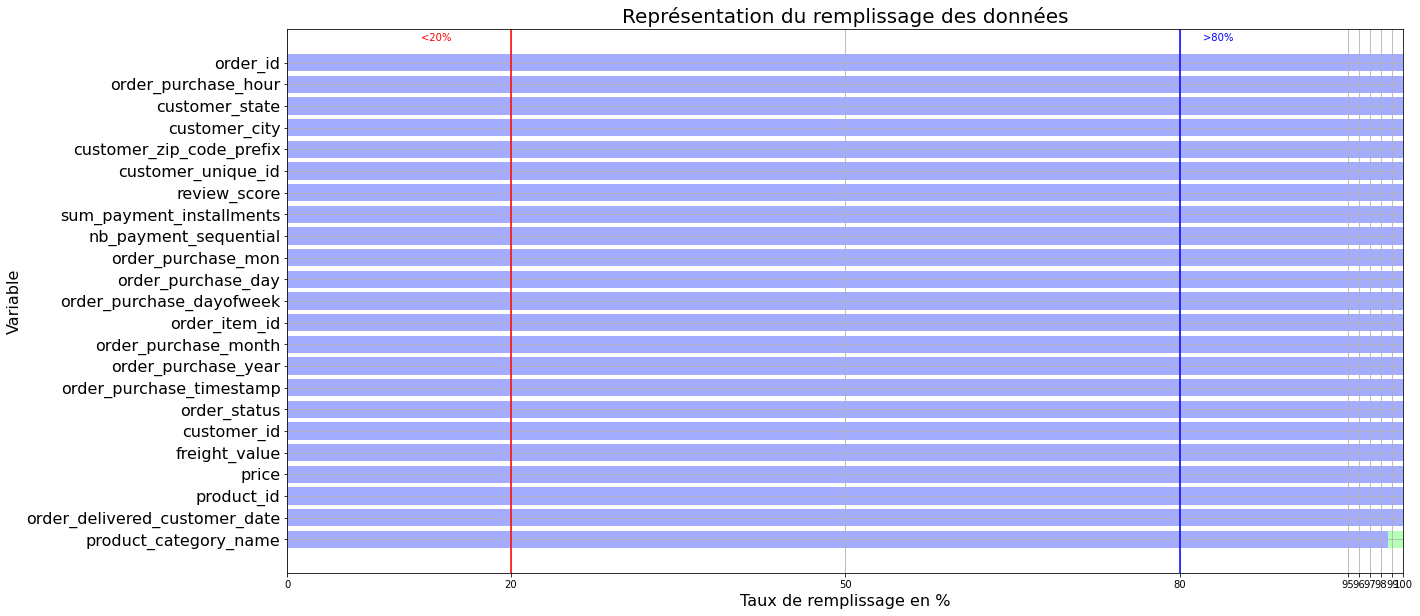

In [50]:
# Appel de la fonction pour l'affichage de l'histogramme des données disponibles par colonne dans le dataset étendu unique
affich_taux_dispo(df_data_dispo_customer,20,10)

### 6.2.1 Traitement des valeurs numériques

In [51]:
# Appel de la fonction pour le traitement des valeurs NaN pour les variables numériques
# nb_payment_sequential et sum_payment_installments
df_data_orders_customers_nan = traite_nan_num(df_data_orders_customers)

------ Imputation valeur 1 si présence valeurs NaN pour variable "nb_payment_sequential" ------
------ Dataset suite imputation valeur 1 si présence valeurs NaN pour variable "nb_payment_sequential" ------
Proportion de NaN : 0.06 %, Taille du jeu de données : (110197, 23)

------ Imputation valeur 1 si présence valeurs NaN pour variable "sum_payment_installments" ------
------ Dataset suite imputation valeur 1 si présence valeurs NaN pour variable "sum_payment_installments" ------
Proportion de NaN : 0.06 %, Taille du jeu de données : (110197, 23)



### 6.2.2 Traitement des valeurs datetime

In [52]:
# Appel de la fonction pour le traitement des valeurs NaN pour les variables datetime
# order_delivered_customer_date
df_data_orders_customers_nan = traite_nan_datetime(df_data_orders_customers_nan)

------ Suppression des valeurs NaN pour variable "order_delivered_customer_date" ------
------ Dataset suite suppression valeurs NaN pour variable "order_delivered_customer_date" ------
Proportion de NaN : 0.06 %, Taille du jeu de données : (110189, 23)



### 6.2.3 Traitement des valeurs qualitatives

In [53]:
# Appel de la fonction pour le traitement des valeurs NaN pour les variables qualitatives
# product_category_name
df_data_orders_customers_nan = traite_nan_object(df_data_orders_customers_nan)

------ Imputation valeur "other" si présence valeurs NaN pour variable "product_category_name" ------
------ Dataset suite imputation valeur 1 si présence valeurs NaN pour variable "product_category_name" ------
Proportion de NaN : 0.0 %, Taille du jeu de données : (110189, 23)



In [54]:
# Appel de la fonction pour créer une dataframe récapitulant le taux de données disponibles dans le dataset étendu unique
# dans le dataset étendu unique
df_data_dispo_customer_nan = desc_data_dispo(df_data_orders_customers_nan)
df_data_dispo_customer_nan

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_year,...,order_purchase_day,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name
nbre valeurs manquantes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nbre de valeurs dispo.,110189,110189,110189,110189,110189,110189,110189,110189,110189,110189,...,110189,110189,110189,110189,110189,110189,110189,110189,110189,110189
taux remplissage,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [55]:
df_data_orders_customers_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110189 entries, 0 to 110196
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110189 non-null  object        
 1   order_item_id                  110189 non-null  int64         
 2   product_id                     110189 non-null  object        
 3   price                          110189 non-null  float64       
 4   freight_value                  110189 non-null  float64       
 5   customer_id                    110189 non-null  object        
 6   order_status                   110189 non-null  object        
 7   order_purchase_timestamp       110189 non-null  datetime64[ns]
 8   order_delivered_customer_date  110189 non-null  datetime64[ns]
 9   order_purchase_year            110189 non-null  int64         
 10  order_purchase_month           110189 non-null  int64         
 11  

# 7. Feature engineering - Création de variables orientées vision client

Maintenant que nous avons notre dataset unique étendu avec les 7 tables principales , nous allons modifier le jeu de données obtenu en créant de nouvelles variables pour avoir une vision orientée client et non sur les commandes / lignes de commande.

Pour information, l'identifiant unique du client est contenu dans la variable customer_unique_id.

In [56]:
# Travail sur copie du dataset nettoyé
df_data_orders_customers = df_data_orders_customers_nan.copy()

## 7.1 Création de la variable "Delai de livraison" pour chaque commande

In [57]:
# Création de la variable "Délai de livraison" pour chaque commande
df_data_orders_customers["delivery_time_days"] = (df_data_orders_customers.order_delivered_customer_date
                                                  - df_data_orders_customers.order_purchase_timestamp)\
                                                  .dt.round('1d').dt.days

# Suppression de la variable 'order_delivered_customer_date' 
df_data_orders_customers.drop("order_delivered_customer_date", axis=1, inplace=True)

In [58]:
df_data_orders_customers.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_purchase_year,order_purchase_month,...,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,delivery_time_days
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017,9,...,Sep,1.0,2.0,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff,8
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017,4,...,Apr,1.0,3.0,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,pet_shop,16
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018,1,...,Jan,1.0,5.0,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,furniture_decor,8


## 7.2 Regroupement des catégories de produit

Le jeu de données initial compte 71 catégories différentes (ce qui peut poser problème pour un encodage lors du preprocessing).  Les catégories de produit vont être regroupées dans des catégories de niveau supérieur, plus petites.

Pour cela, nous allons nous baser sur les catégories principales proposées par les sites de e-commerce dans le monde:

- Fashion, clothing and accessories (Mode, vêtements, accessoires)
- Health and Beauty (Santé et beauté)
- Toys and baby equipment (Jouets et équipement du bébé)
- Books, CDs and other physical media (Biens culturels: livres, CD et autres média physiques)
- Groceries, food and drink (Epicerie, nourriture, et boissons)
- Technology (including phones and computers) (Technologie avec les téléphones et les ordinateurs)
- Home and furniture (Maison et fournitures)
- Flowers and gifts (Fleurs et cadeaux)
- Sport (Articles de sport)
- Other (Autre)

In [59]:
# Regroupement des catégories de produit en catégories de niveau supérieur
df_data_orders_customers['product_category'] = np.where((df_data_orders_customers['product_category_name'].str.contains("fashio|luggage")==True),
                                                        'fashion_clothing_accessories',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("health|beauty|perfum")==True),
                                                        'health_beauty',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("toy|baby|diaper")==True),
                                                         'toys_baby',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                                         'books_cds_media',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("grocer|food|drink")==True), 
                                                         'groceries_food_drink',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                                         'technology',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                         'home_furniture',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("flow|gift|stuff")==True),
                                                         'flowers_gifts',
                                               np.where((df_data_orders_customers['product_category_name'].str.contains("sport")==True),
                                                         'sport', 'other')))))))))


In [60]:
# Suppression de la variable "product_category_name"
df_data_orders_customers.drop("product_category_name", axis=1, inplace=True)

df_data_orders_customers.head(3)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_purchase_year,order_purchase_month,...,order_purchase_mon,nb_payment_sequential,sum_payment_installments,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time_days,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017,9,...,Sep,1.0,2.0,5.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,8,flowers_gifts
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017,4,...,Apr,1.0,3.0,4.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,16,other
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018,1,...,Jan,1.0,5.0,5.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,8,home_furniture


## 7.3 Création d'une variable par catégorie de produit

Cette variable est utile pour y dispatcher le nombre de produits achetés sur les commandes passées par catégories de produit.

In [61]:
# Commandes client avec décomposition du nombre d'articles par catégorie de produit
categories_customers = df_data_orders_customers.groupby(["customer_unique_id", "product_category"])\
                        .agg({"order_item_id": "count"}).unstack()


# Suppression du niveau supérieur (niveau lignes de commande)
categories_customers.columns = categories_customers.columns.droplevel(0)

# Remplacement de valeurs NaN par la valeur 0
categories_customers.fillna(0, inplace=True)

# Calcul du nombre d'articles commandés par client et par catégorie de produit
categories_customers["total_items"] = categories_customers.sum(axis=1)

categories_customers.head(3)

product_category,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 7.4 Calcul ratio nombre articles commandés par client par catégorie de produit

In [62]:
# Calcul du ratio du nombre de produits par catégorie sur le nombre de produits total acheté par le client
for col in categories_customers.columns:
    if (col != "total_items"):
        categories_customers[col] = (categories_customers[col]/categories_customers["total_items"])

categories_customers.reset_index(inplace=True)
categories_customers.head(3)

product_category,customer_unique_id,books_cds_media,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 7.5 Calcul du nombre moyen d'articles par commande pour chaque client

In [64]:
# Calcul du nombre moyen d'articles par commande pour chaque client
products_per_order = df_data_orders_customers.groupby(["customer_unique_id", "order_id"])\
                                                        .agg({"order_item_id": "count"})
products_per_order = products_per_order.groupby("customer_unique_id")\
                        .agg({"order_item_id": "mean"})

products_per_order.head(3)

,order_item_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1.0
0000f46a3911fa3c0805444483337064,1.0


## 7.6 Calcul du nombre de jours écoulés entre la première et la dernière commande

In [65]:
# Calcul de la première et dernière date de commande pour chaque client
order_delay = df_data_orders_customers.groupby("customer_unique_id")\
                .agg({"order_purchase_timestamp": ["min","max"]})

# Suppression du niveau date d'achat
order_delay.columns = order_delay.columns.droplevel(0)

# Calcul de la date de dernière commande, tous clients confondus
max_date = df_data_orders_customers["order_purchase_timestamp"].max()
print('Date dernier achat, tous clients confondus: ' + str(max_date))

# Calcul du délai depuis le dernier achat
order_delay["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (max_date - y[0]).round('1d').days 
                                    for x,y in order_delay.iterrows()]

# Suppression des colonnes "min" et "max"
order_delay.drop(["min", "max"], axis=1, inplace=True)

order_delay.head(3)

Date dernier achat, tous clients confondus: 2018-08-29 15:00:37


,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537


## 7.7 Création du dataset orienté client

### 7.7.1 Regroupement des variables utiles par client

In [66]:
# Regroupement des clients 
df_data_orders_customers_ml = df_data_orders_customers.groupby("customer_unique_id")\
                                                            .agg({"order_id": "nunique",
                                                                  "price": "sum",
                                                                  "freight_value": "sum",
                                                                  "nb_payment_sequential": "mean",
                                                                  "review_score" : "mean",
                                                                  "sum_payment_installments": "mean", 
                                                                  "delivery_time_days": "mean",
                                                                  "order_purchase_year": lambda x:x.value_counts().index[0],
                                                                  "order_purchase_month": lambda x:x.value_counts().index[0],
                                                                  "order_purchase_hour": lambda x:x.value_counts().index[0]})

# Renommage des colonnes
df_data_orders_customers_ml = df_data_orders_customers_ml.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "delivery_time_days": "mean_delivery_days",
                            "order_purchase_year": "favorite_purchase_year",
                            "order_purchase_month": "favorite_purchase_month",
                            "order_purchase_hour": "favorite_purchase_hour"})

df_data_orders_customers_ml.head(10)

,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,favorite_purchase_hour
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,5.0,8.0,6.0,2018,5,10
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,4.0,1.0,3.0,2018,5,11
0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,3.0,8.0,26.0,2017,3,21
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,2017,10,20
0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,5.0,6.0,13.0,2017,11,19
0004bd2a26a76fe21f786e4fbd80607f,1,154.00,12.98,1.0,4.0,8.0,2.0,2018,4,19
00050ab1314c0e55a6ca13cf7181fecf,1,27.99,7.39,1.0,4.0,1.0,7.0,2018,4,12
00053a61a98854899e70ed204dd4bafe,1,382.00,37.18,1.0,1.0,3.0,16.0,2018,2,11
0005e1862207bf6ccc02e4228effd9a0,1,135.00,15.12,1.0,4.0,3.0,4.0,2017,3,23


In [67]:
df_data_orders_customers_ml.shape

(93350, 10)

### 7.7.2 Merge avec la décomposition du nombre d'articles par catégorie de produit

In [68]:
# Merge avec la décomposition des nombre d'articles par catégorie de produit
df_data_orders_customers_ml = pd.merge(df_data_orders_customers_ml, categories_customers,
                                        how="left",
                                        on="customer_unique_id")

df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,...,fashion_clothing_accessories,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,12.00,1.0,5.0,8.0,6.0,2018,5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,8.29,1.0,4.0,1.0,3.0,2018,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,1,69.0,17.22,1.0,3.0,8.0,26.0,2017,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [69]:
df_data_orders_customers_ml.shape

(93350, 22)

### 7.7.3 Merge avec le nombre moyen d'articles par commande pour chaque client

In [70]:
# Merge avec le nombre moyen d'articles par commande pour chaque client
df_data_orders_customers_ml = pd.merge(df_data_orders_customers_ml, products_per_order,
                                        how="left",
                                        on="customer_unique_id")\
                                        .rename(columns={"order_item_id": "mean_nb_items"})

df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,...,flowers_gifts,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,12.00,1.0,5.0,8.0,6.0,2018,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,8.29,1.0,4.0,1.0,3.0,2018,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0000f46a3911fa3c0805444483337064,1,69.0,17.22,1.0,3.0,8.0,26.0,2017,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [71]:
df_data_orders_customers_ml.shape

(93350, 23)

### 7.7.4 Merge avec le nombre de jours écoulés entre la première et la dernière commande du client

In [72]:
# Merge avec le nombre de jours écoulés entre la première et la dernière commande du client
df_data_orders_customers_ml = pd.merge(df_data_orders_customers_ml, order_delay,
                how="left",
                on="customer_unique_id")

df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,12.00,1.0,5.0,8.0,6.0,2018,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,8.29,1.0,4.0,1.0,3.0,2018,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.0,17.22,1.0,3.0,8.0,26.0,2017,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537


In [73]:
df_data_orders_customers_ml.shape

(93350, 24)

### 7.7.5 Calcul du délai moyen entre plusieurs achats

In [74]:
# Calcul du délai moyen entre plusieurs achats
df_data_orders_customers_ml["order_total_delay"] = df_data_orders_customers_ml["order_total_delay"] / df_data_orders_customers_ml["nb_orders"]
df_data_orders_customers_ml = df_data_orders_customers_ml.rename(columns={"order_total_delay": "order_mean_delay"})
 
    
df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,...,groceries_food_drink,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_mean_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,12.00,1.0,5.0,8.0,6.0,2018,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,8.29,1.0,4.0,1.0,3.0,2018,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114.0
2,0000f46a3911fa3c0805444483337064,1,69.0,17.22,1.0,3.0,8.0,26.0,2017,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537.0


### 7.7.6 Calcul du ratio Frêt / total de la commande

In [75]:
# Calcul du ratio Frêt / total de la commande
df_data_orders_customers_ml["freight_ratio"] = round(df_data_orders_customers_ml["total_freight"] /\
                                                     (df_data_orders_customers_ml["total_spend"] +\
                                                      df_data_orders_customers_ml["total_freight"]),2)

df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,...,health_beauty,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,12.00,1.0,5.0,8.0,6.0,2018,5,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111.0,0.08
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,8.29,1.0,4.0,1.0,3.0,2018,5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114.0,0.30
2,0000f46a3911fa3c0805444483337064,1,69.0,17.22,1.0,3.0,8.0,26.0,2017,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537.0,0.20


### 7.7.7 Calcul du prix moyen par commande du client

In [76]:
# Calcul du prix moyen par commande du client
df_data_orders_customers_ml["mean_price_order"] = round(df_data_orders_customers_ml["total_spend"] /\
                                                        df_data_orders_customers_ml["nb_orders"],2)
df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,...,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,12.00,1.0,5.0,8.0,6.0,2018,5,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111.0,0.08,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,8.29,1.0,4.0,1.0,3.0,2018,5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114.0,0.30,18.9
2,0000f46a3911fa3c0805444483337064,1,69.0,17.22,1.0,3.0,8.0,26.0,2017,3,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537.0,0.20,69.0


### 7.7.8 Intégration des frais de livraison dans le total dépensé sur une commande

In [77]:
# Intégration des frais de livraison dans le total dépensé sur une commande
df_data_orders_customers_ml["total_spend"] = (df_data_orders_customers_ml["total_spend"] + df_data_orders_customers_ml["total_freight"])

# Suppression de la variable "total_freight"
df_data_orders_customers_ml.drop("total_freight", axis=1, inplace=True)

df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,favorite_purchase_hour,...,home_furniture,other,sport,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,5.0,8.0,6.0,2018,5,10,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,111.0,0.08,129.9
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,1.0,3.0,2018,5,11,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,114.0,0.30,18.9
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,3.0,8.0,26.0,2017,3,21,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,537.0,0.20,69.0


### 7.7.9 Intégration des données de localisation

In [78]:
# suppression de la colonne "customer_id" dans la table Client
df_customers.drop("customer_id", axis=1, inplace=True)

# Sélection des valeurs les plus fréquentes
df_customers_info = df_customers.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])
#df_customers_info

# Merge des informations de localisation dans la table orientée client
df_data_orders_customers_ml = pd.merge(df_data_orders_customers_ml, df_customers_info,
                                       how="left",
                                       on="customer_unique_id")

df_data_orders_customers_ml.head()

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,favorite_purchase_hour,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,5.0,8.0,6.0,2018,5,10,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,1.0,3.0,2018,5,11,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,SP
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,3.0,8.0,26.0,2017,3,21,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,2017,10,20,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,5.0,6.0,13.0,2017,11,19,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,SP


### 7.7.10 Remplacement des sigles des états par des noms

Les codes états ne sont pas très parlant. Nous allons donc utiliser Wikipedia pour modifier les codes états par leur nom.

In [79]:
wiki_url = "https://en.wikipedia.org/wiki/Federative_units_of_Brazil"
states_table = pd.read_html(wiki_url)[1].set_index("Code")
states_table.head(3)

,Flag and name,Capital,Largest city,Area(km2)[1],Population(2019)[2],"Density (perkm2, 2019)","GDP (R$millions, 2016)[3]",HDI(2017)[4]
Code,,,,,,,,
AC,Acre,Rio Branco,Rio Branco,164124,881935,5.37,13751,0.719
AL,Alagoas,Maceió,Maceió,27843,3337357,119.86,49456,0.683
AP,Amapá,Macapá,Macapá,142471,845731,5.94,14339,0.740


In [80]:
# Merge de la table orientée client avec avec les noms des états brésiliens
df_data_orders_customers_ml = pd.merge(df_data_orders_customers_ml.reset_index(), states_table[["Flag and name"]],
                                        how="left",
                                        left_on="customer_state",
                                        right_on="Code")

# Suppression de la colonne "customer_date"
df_data_orders_customers_ml.drop("customer_state", axis=1, inplace=True)

# Renommage de la colonne "Flag and name"
df_data_orders_customers_ml = df_data_orders_customers_ml.rename(columns={"Flag and name": "customer_state"})

df_data_orders_customers_ml.head()

,index,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,...,technology,toys_baby,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,5.0,8.0,6.0,2018,5,...,0.0,0.0,1.0,1.0,111.0,0.08,129.90,7787,cajamar,São Paulo
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,1.0,3.0,2018,5,...,0.0,0.0,1.0,1.0,114.0,0.30,18.90,6053,osasco,São Paulo
2,2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,3.0,8.0,26.0,2017,3,...,0.0,0.0,1.0,1.0,537.0,0.20,69.00,88115,sao jose,Santa Catarina
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,1.0,4.0,4.0,20.0,2017,10,...,1.0,0.0,1.0,1.0,321.0,0.40,25.99,66812,belem,Pará
4,4,0004aac84e0df4da2b147fca70cf8255,1,196.89,1.0,5.0,6.0,13.0,2017,11,...,1.0,0.0,1.0,1.0,288.0,0.09,180.00,18040,sorocaba,São Paulo


### 7.7.11 Calcul de la distance Harversine entre l'état du client et le siège de Olist

 Calcul de la distance Harversine entre l'état du client (moyenne des latitudes et longitudes de l'état) et le siège de Olist. 

In [81]:
# Calcul de la moyenne des latitudes et longitudes de l'état
state_location = df_geolocation.groupby("geolocation_state").mean()

# Merge des tables des états et de localisation
state_location = pd.merge(states_table[["Flag and name"]].reset_index(), 
                          state_location, 
                          right_on="geolocation_state", 
                          left_on="Code", 
                          how="left")

# Sélection de variables
state_location = state_location[["Flag and name", "geolocation_lat", "geolocation_lng"]]

# Localisation géographique du siège Olist
olist_lat = -25.43045
olist_lon = -49.29207

state_location.head()

,Flag and name,geolocation_lat,geolocation_lng
0,Acre,-9.702555,-68.451852
1,Alagoas,-9.599729,-36.052017
2,Amapá,0.086025,-51.234304
3,Amazonas,-3.349336,-60.537430
4,Bahia,-13.049361,-39.560649


In [82]:
# Appel de la fonction pour calcul de la distance Harversine between entre le centre de l'état du client et le siége Olist
state_location['harvesine_distance'] = [distance_haversine(olist_lat, olist_lon, x, y) 
                              for x, y in zip(state_location.geolocation_lat, 
                                              state_location.geolocation_lng)]

state_location.head()

,Flag and name,geolocation_lat,geolocation_lng,harvesine_distance
0,Acre,-9.702555,-68.451852,1659.960379
1,Alagoas,-9.599729,-36.052017,1395.749663
2,Amapá,0.086025,-51.234304,1766.549480
3,Amazonas,-3.349336,-60.537430,1697.491449
4,Bahia,-13.049361,-39.560649,1063.469329


In [83]:
# Merge de la table orientée client et de la table localisation avec distance harversine
df_data_orders_customers_ml = pd.merge(df_data_orders_customers_ml, state_location[["Flag and name", "harvesine_distance"]],
                                         how="left",
                                         left_on="customer_state",
                                         right_on="Flag and name")
# Suppression de l'index et régénération
df_data_orders_customers_ml.drop("index", axis=1, inplace=True)

df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,favorite_purchase_hour,...,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,Flag and name,harvesine_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,5.0,8.0,6.0,2018,5,10,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,São Paulo,São Paulo,209.713834
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,1.0,3.0,2018,5,11,...,1.0,1.0,114.0,0.30,18.9,6053,osasco,São Paulo,São Paulo,209.713834
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,3.0,8.0,26.0,2017,3,21,...,1.0,1.0,537.0,0.20,69.0,88115,sao jose,Santa Catarina,Santa Catarina,125.363853


In [84]:
df_data_orders_customers_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93350 entries, 0 to 93349
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            93350 non-null  object 
 1   nb_orders                     93350 non-null  int64  
 2   total_spend                   93350 non-null  float64
 3   mean_payment_sequential       93350 non-null  float64
 4   mean_review_score             93350 non-null  float64
 5   mean_payment_installments     93350 non-null  float64
 6   mean_delivery_days            93350 non-null  float64
 7   favorite_purchase_year        93350 non-null  int64  
 8   favorite_purchase_month       93350 non-null  int64  
 9   favorite_purchase_hour        93350 non-null  int64  
 10  books_cds_media               93350 non-null  float64
 11  fashion_clothing_accessories  93350 non-null  float64
 12  flowers_gifts                 93350 non-null  float64
 13  g

# 8. Nettoyage des données - Traitement des outliers

In [85]:
# Affichage d'un récapitulatif des outliers pour les colonnes numériques de la dataframe des commandes/lignes de commande
desc_outliers_df(df_data_orders_customers_ml)

 ------ Traitement de outliers: liste des colonnes quantitatives à traiter ------
Index(['nb_orders', 'total_spend', 'mean_payment_sequential',
       'mean_review_score', 'mean_payment_installments', 'mean_delivery_days',
       'favorite_purchase_year', 'favorite_purchase_month',
       'favorite_purchase_hour', 'books_cds_media',
       'fashion_clothing_accessories', 'flowers_gifts', 'groceries_food_drink',
       'health_beauty', 'home_furniture', 'other', 'sport', 'technology',
       'toys_baby', 'total_items', 'mean_nb_items', 'order_mean_delay',
       'freight_ratio', 'mean_price_order', 'customer_zip_code_prefix',
       'harvesine_distance'],
      dtype='object')



,Min,Max,Nbre > 0,Nbre < 0
nb_orders,1,15,93350,0
total_spend,9.59,13664.1,93350,0
mean_payment_sequential,1,26,93350,0
mean_review_score,1,5,93350,0
mean_payment_installments,0,26,93350,0
mean_delivery_days,1,210,93350,0
favorite_purchase_year,2016,2018,93350,0
favorite_purchase_month,1,12,93350,0
favorite_purchase_hour,0,23,93350,0
books_cds_media,0,1,93350,0


Il y a une valeur aberrante pour la variable "mean_payment_installments": il faut modifier les lignes avec la valeur 0 par la valeur 1, car il y a toujours au moins une échéance de paiement en moyenne (c'est-à-dire paiement comptant).

## 8.1 Traitement des valeurs numériques - valeurs aberrantes

In [86]:
df_data_orders_customers_outliers = traite_outliers_num(df_data_orders_customers_ml)

----- Remplacement des valeurs 0 par la valeur 1 pour la variable "mean_payment_installments" ------
------ Dataset suite traitement outliers pour variable "mean_payment_installments" ------
Proportion de NaN : 0.0 %, Taille du jeu de données : (93350, 30)



In [87]:
# Affichage d'un récapitulatif des outliers pour les colonnes numériques de la dataframe des commandes/lignes de commande
desc_outliers_df(df_data_orders_customers_outliers)

 ------ Traitement de outliers: liste des colonnes quantitatives à traiter ------
Index(['nb_orders', 'total_spend', 'mean_payment_sequential',
       'mean_review_score', 'mean_payment_installments', 'mean_delivery_days',
       'favorite_purchase_year', 'favorite_purchase_month',
       'favorite_purchase_hour', 'books_cds_media',
       'fashion_clothing_accessories', 'flowers_gifts', 'groceries_food_drink',
       'health_beauty', 'home_furniture', 'other', 'sport', 'technology',
       'toys_baby', 'total_items', 'mean_nb_items', 'order_mean_delay',
       'freight_ratio', 'mean_price_order', 'customer_zip_code_prefix',
       'harvesine_distance'],
      dtype='object')



,Min,Max,Nbre > 0,Nbre < 0
nb_orders,1,15,93350,0
total_spend,9.59,13664.1,93350,0
mean_payment_sequential,1,26,93350,0
mean_review_score,1,5,93350,0
mean_payment_installments,1,26,93350,0
mean_delivery_days,1,210,93350,0
favorite_purchase_year,2016,2018,93350,0
favorite_purchase_month,1,12,93350,0
favorite_purchase_hour,0,23,93350,0
books_cds_media,0,1,93350,0


In [88]:
df_data_orders_customers_outliers.head(3)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_year,favorite_purchase_month,favorite_purchase_hour,...,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,Flag and name,harvesine_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,1.0,5.0,8.0,6.0,2018,5,10,...,1.0,1.0,111.0,0.08,129.9,7787,cajamar,São Paulo,São Paulo,209.713834
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,1.0,3.0,2018,5,11,...,1.0,1.0,114.0,0.30,18.9,6053,osasco,São Paulo,São Paulo,209.713834
2,0000f46a3911fa3c0805444483337064,1,86.22,1.0,3.0,8.0,26.0,2017,3,21,...,1.0,1.0,537.0,0.20,69.0,88115,sao jose,Santa Catarina,Santa Catarina,125.363853


# 9. Analyse exploratoire des données

## 9.1 Analyse univariée des variables numériques

### 9.1.1 Variable "nb_orders" (nombre de commandes du client)

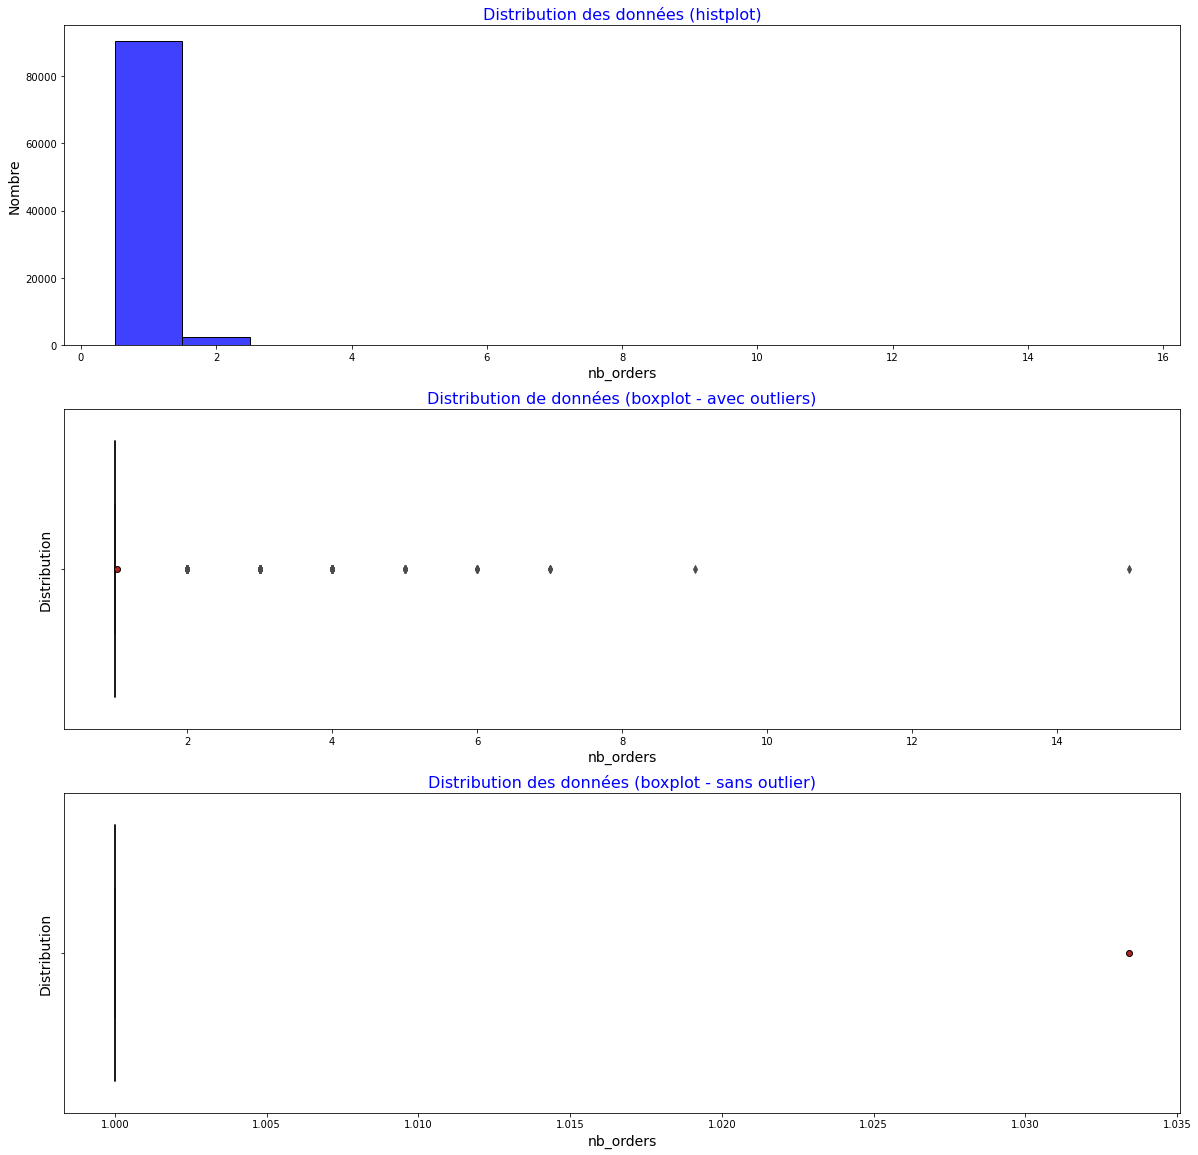

In [89]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'nb_orders', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)',10, kde=False, discrete=True)

Distribution dissymétrique à gauche.

La majorité des commandes ne comporte qu'un seul article.

Pas de traitement particulier pour les valeurs atypiques, cela correspond à un nombre de commandes (jusqu'à 15) conforme. 

### 9.1.2 Variable "total_spend" (montant total dépensé par le client)

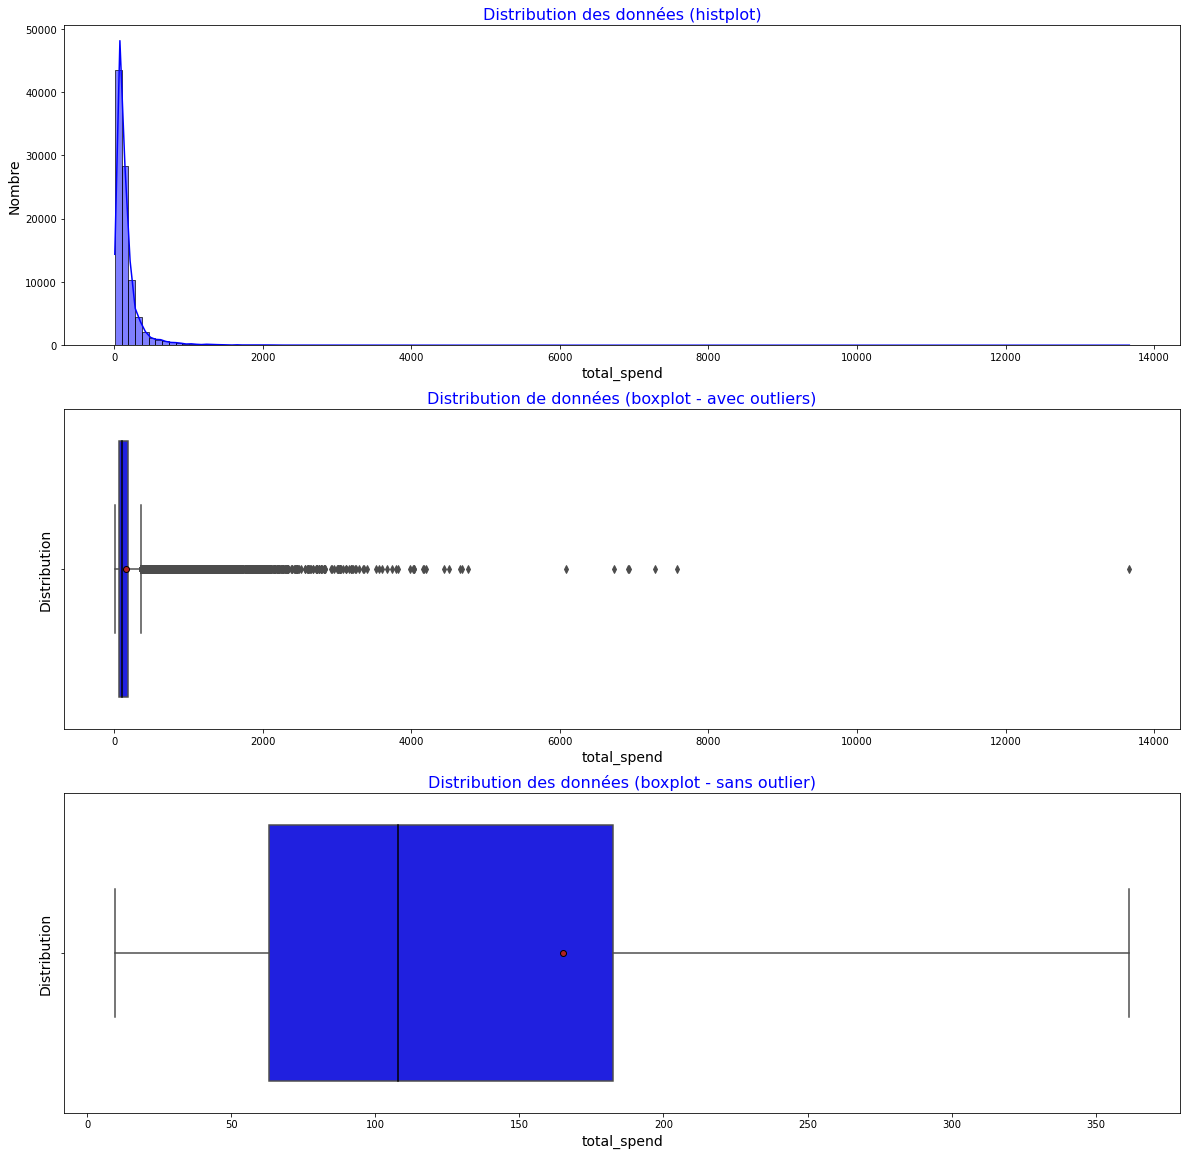

In [90]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'total_spend', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 150, kde=True, discrete=False)

Distribution dissymétrique à gauche.

Les clients dépensent en général, des montants cumulés d'achats assez faibles (pas plus de 350 unités monétaires) sur le site Olist.

Il y a certaines valeurs atypiques, comme une dépense totale de plus de 13000 unités monétaires.
Nous éliminerons les valeurs atypiques sur cette variable, par la méthode des inter-quartiles.

### 9.1.3 Variable "mean_payment_sequential" (nombre moyens de paiement)

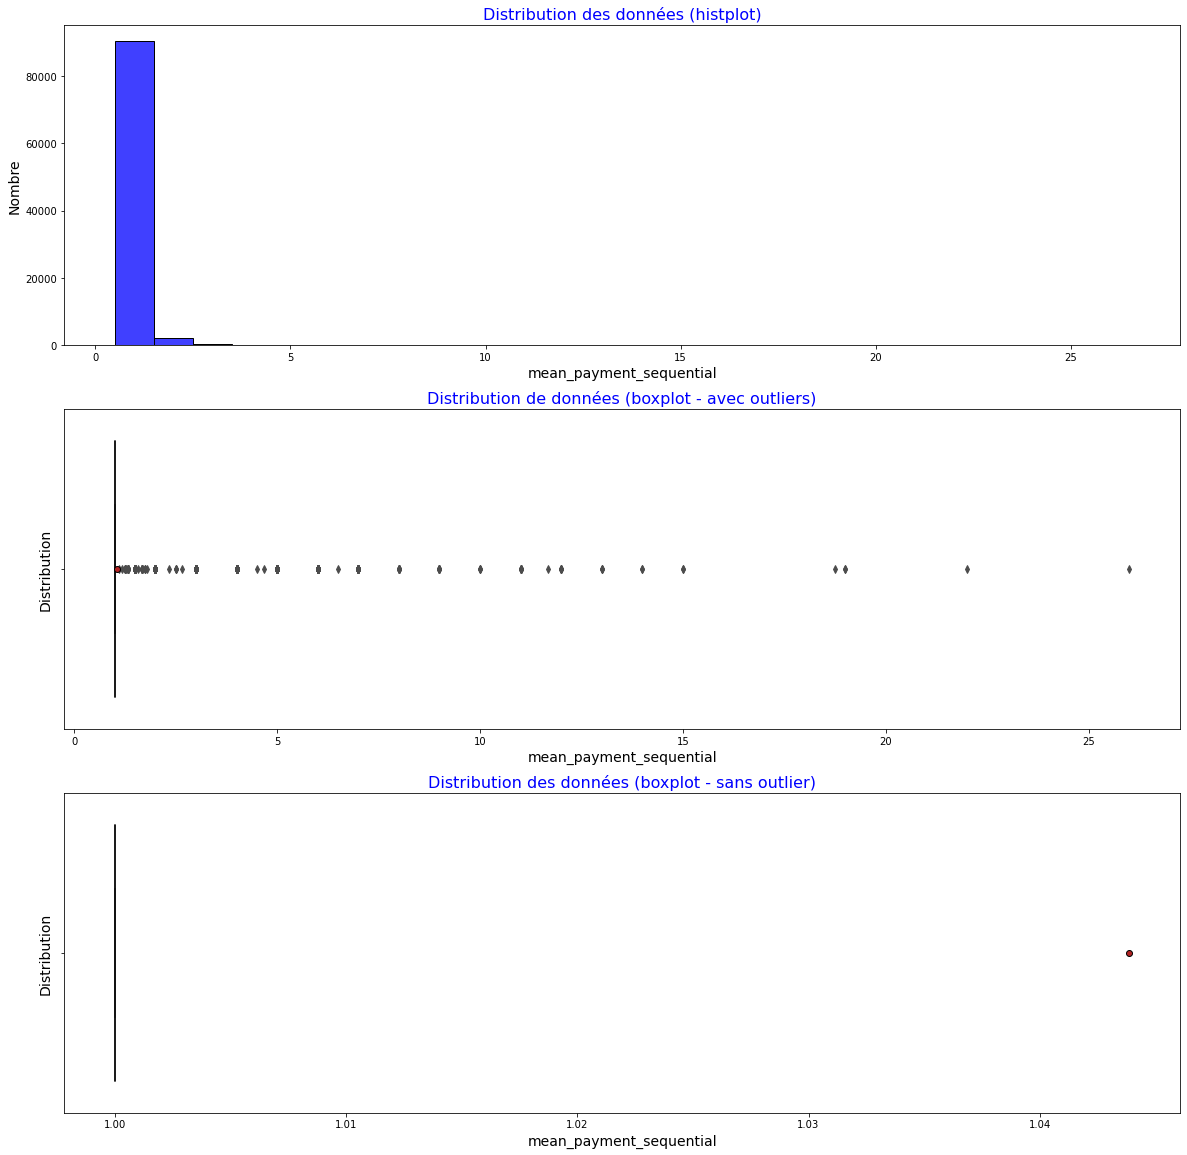

In [91]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'mean_payment_sequential',
                         'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 25, kde=False, discrete=True)

Distribution dissymétrique à gauche.

La majorité des clients paient avec un seul moyen  de paiement (carte de crédit,...).

Pas de traitement particulier des valeurs atypiques.


### 9.1.4 Variable "mean_review_score" (moyenne de avis client)

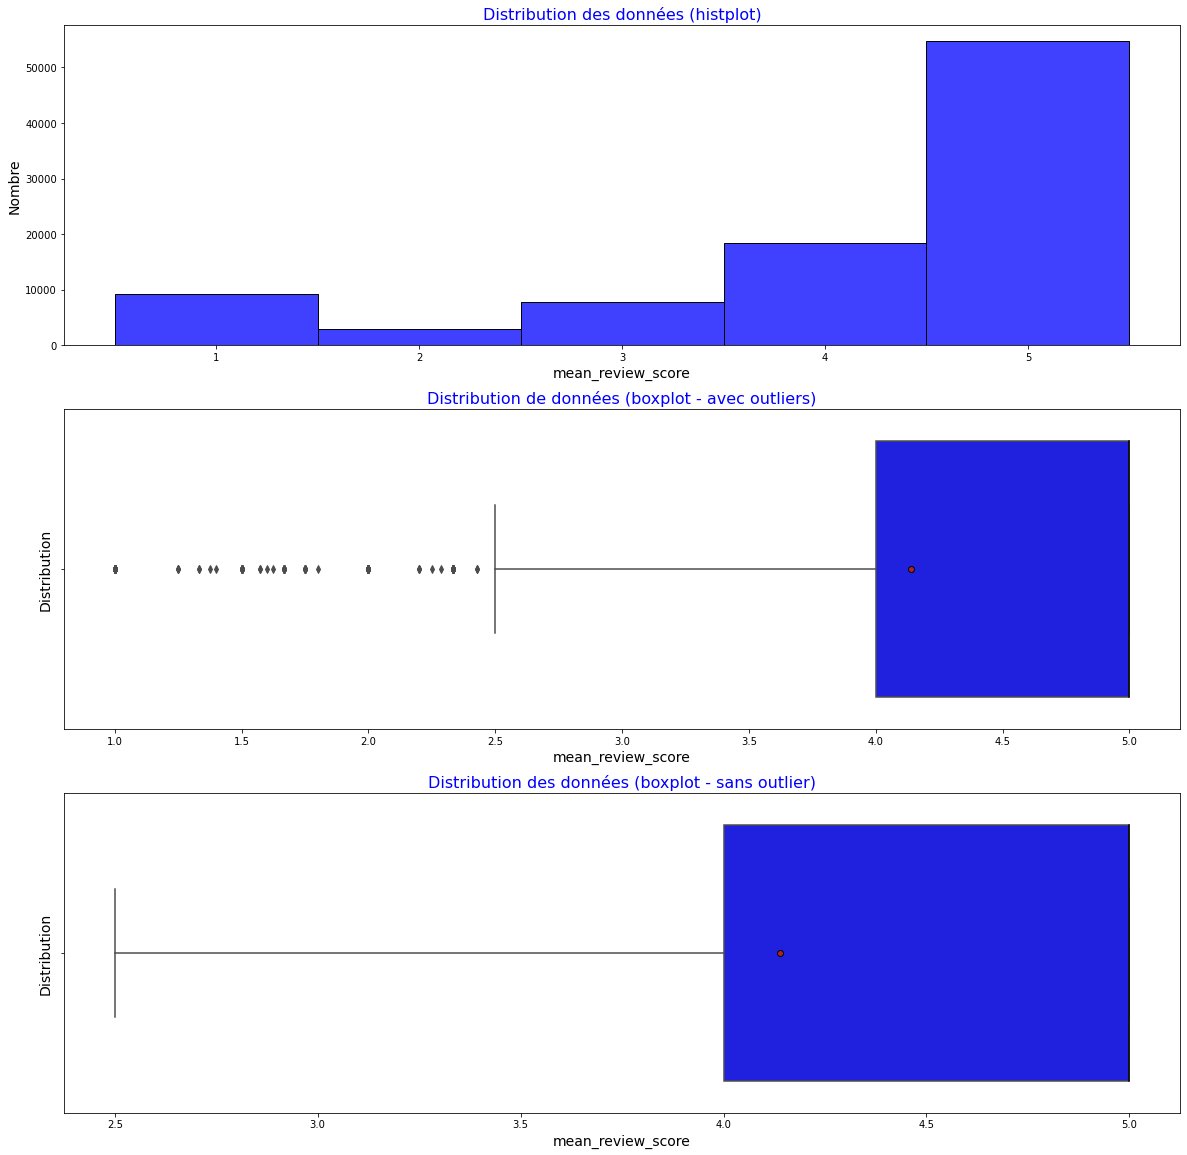

In [92]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'mean_review_score',
                         'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 5, kde=False, discrete=True)

Distribution dissymétrique à droitr.

Les avis client sont en majorité entre 4 et 5.

Pas de traitement particulier des valeurs atypiques.

### 9.1.5 Variable "mean_payment_installments" ( nombre moyen d'échéances de paiement)

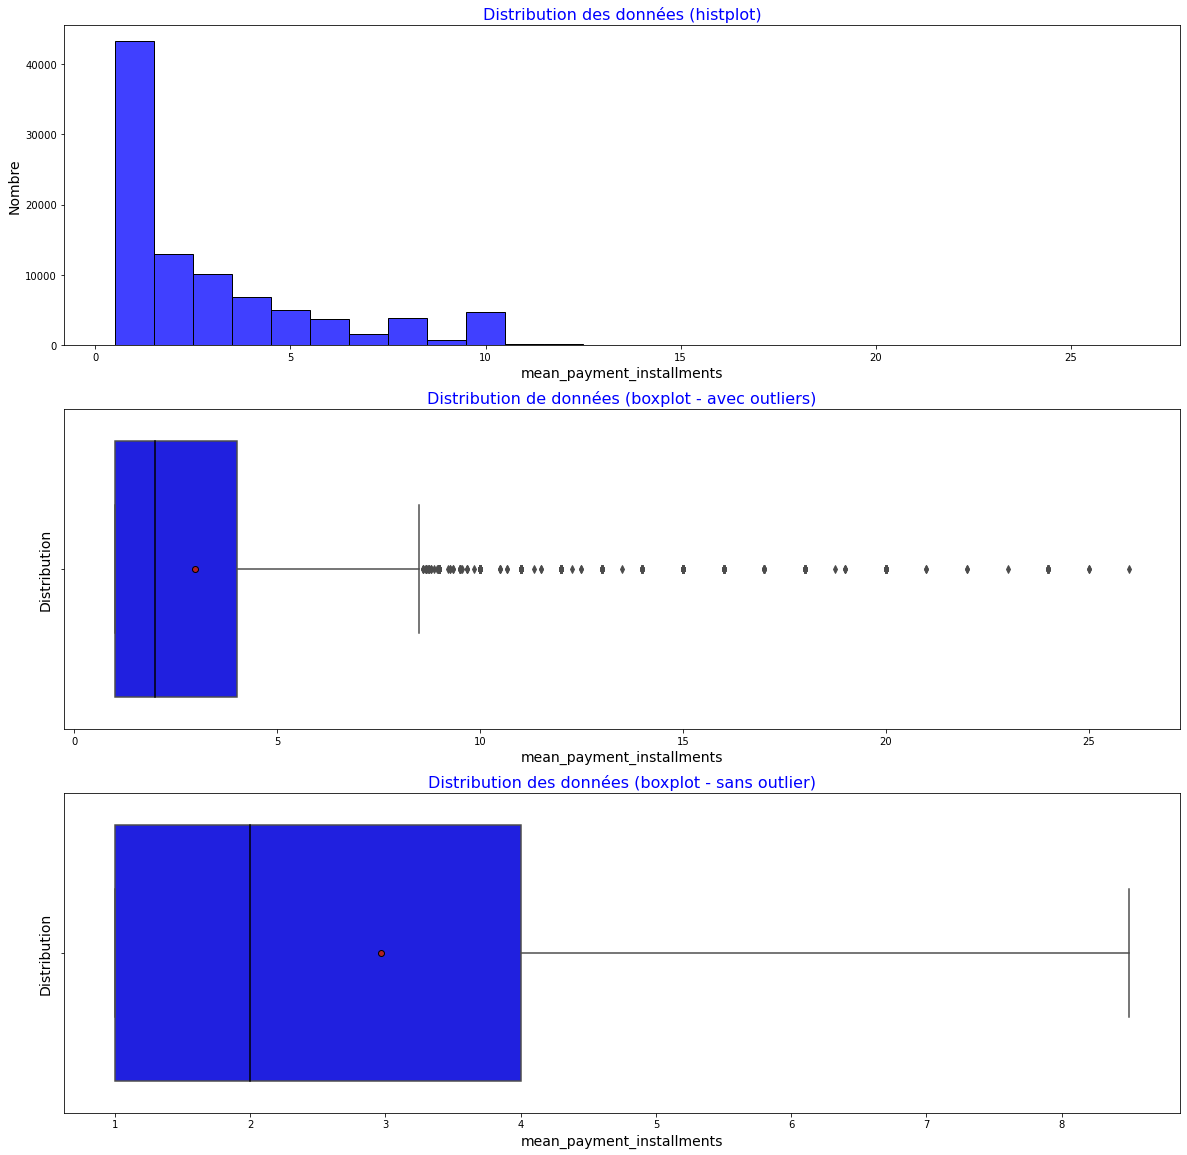

In [93]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'mean_payment_installments',
                         'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 10, kde=False, discrete=True)

Distribution dissymétrique à gauche.

Les clients paient majoritairement jusqu'à 4 fois, et souvent en une seule fois.

Pas de traitement particulier des valeurs atypiques.

### 9.1.6 Variable "mean_delivery_days" (délai moyen de livraison du client)

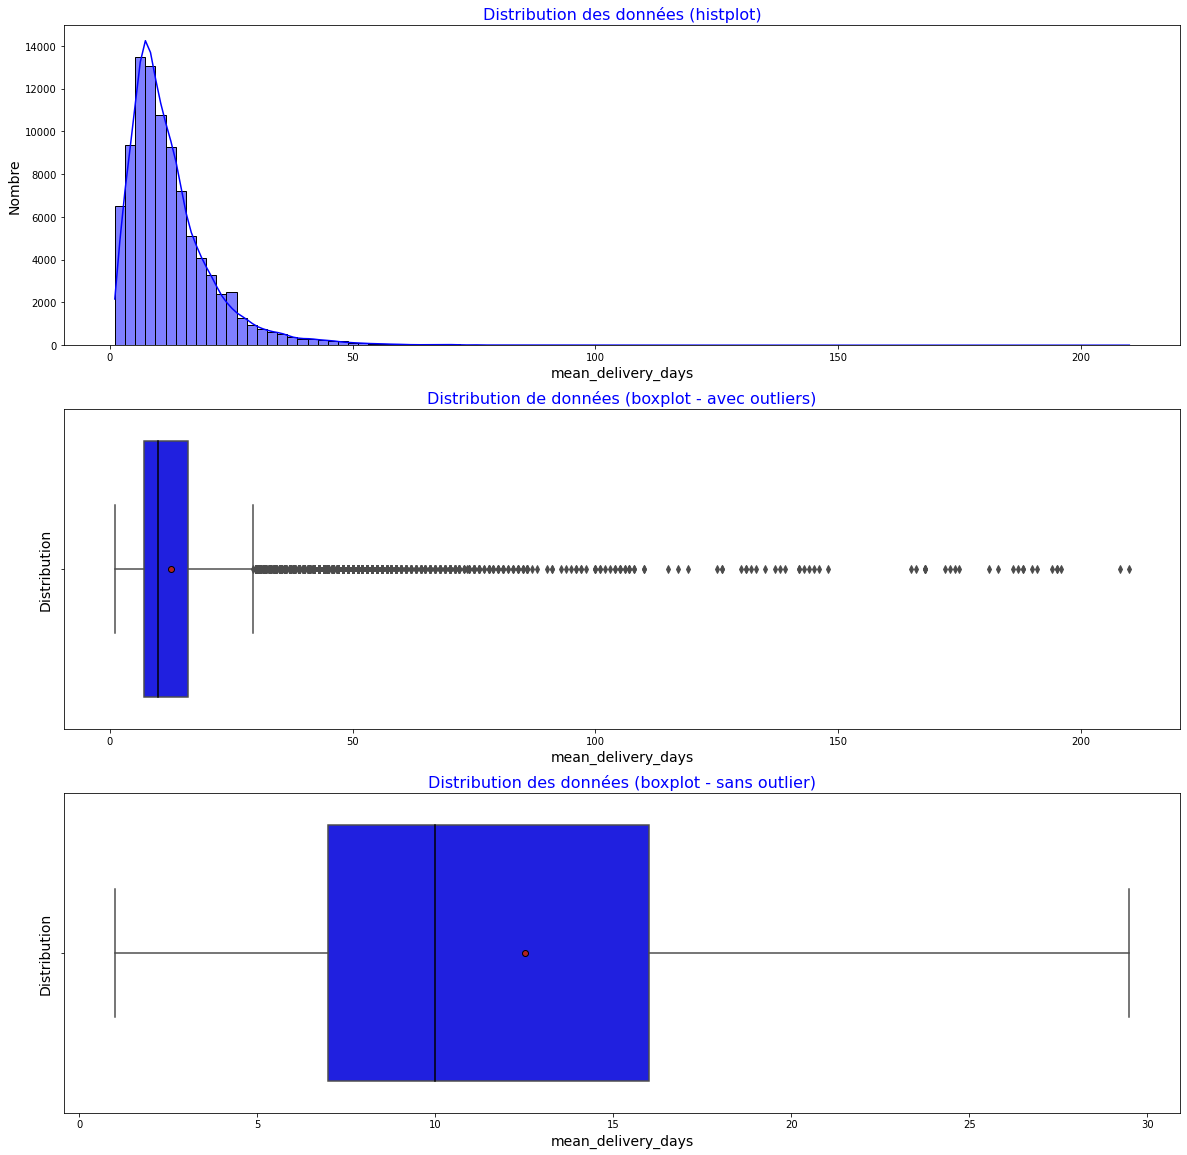

In [94]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'mean_delivery_days',
                         'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 100, kde=True, discrete=False)

Distribution quasi normale de la variable.

En moyenne, la delai de livraison est de 10 jours.

Il y a des valeurs atypiques avec des délais de livraion supérieurs à 30 jours

Ces valeurs atypiques seront analysés et eliminés par la méthode des inter-quartiles.

### 9.1.7 Variable "favorite_purchase_month" (mois d'achat favori du client)

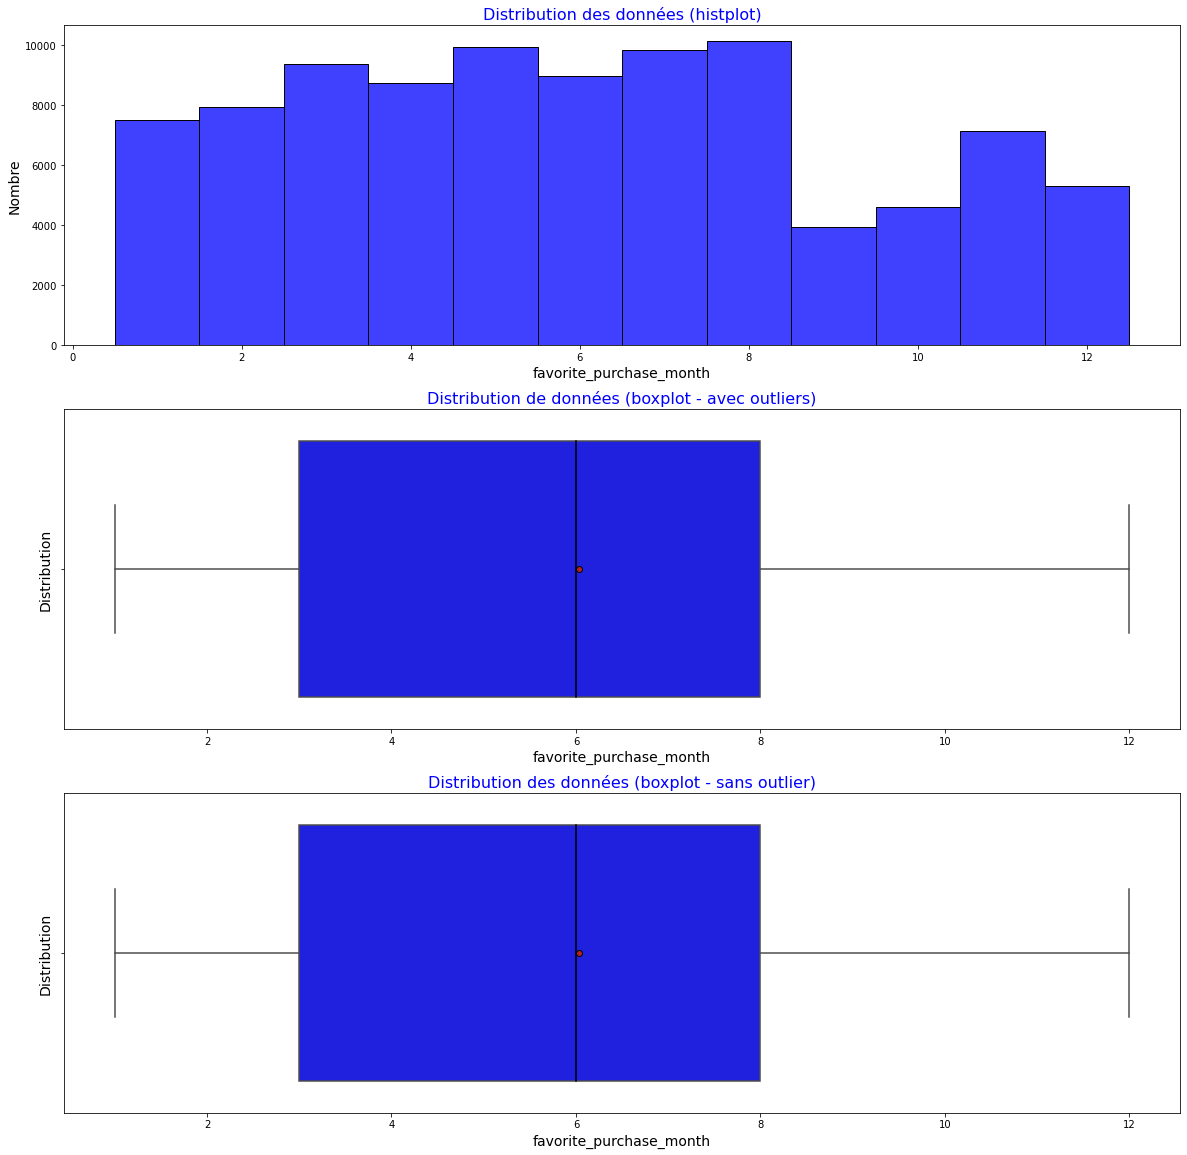

In [95]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'favorite_purchase_month',
                         'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 12, kde=False, discrete=True)

Distribution homogène des données sur tous les mois de l'année, avec un flux d'achat plus important mai et août.

Pas de valeur atypique.

### 9.1.8 Variable "favorite_purchase_hour" (Heure d'achat favorite) 

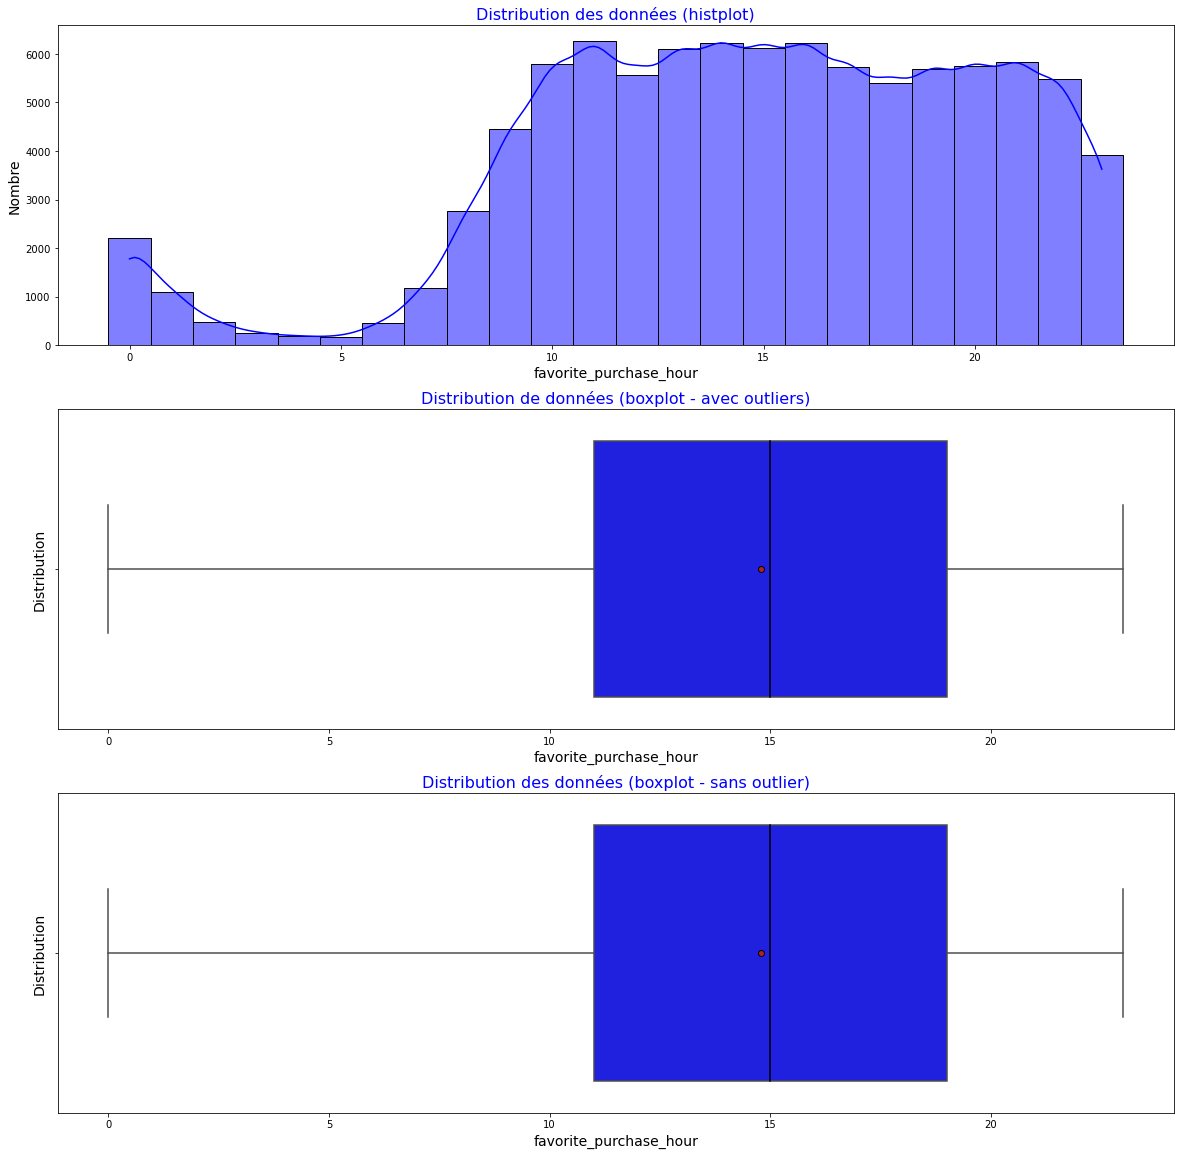

In [96]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'favorite_purchase_hour',
                         'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 24, kde=True, discrete=True)

Distribution homogène des données sur les heures de la journée.

Les clients privilégient les achats entre 11h et 16h.

Pas de valeur atypique.

### 9.1.9 Variables "Catégories de produit"

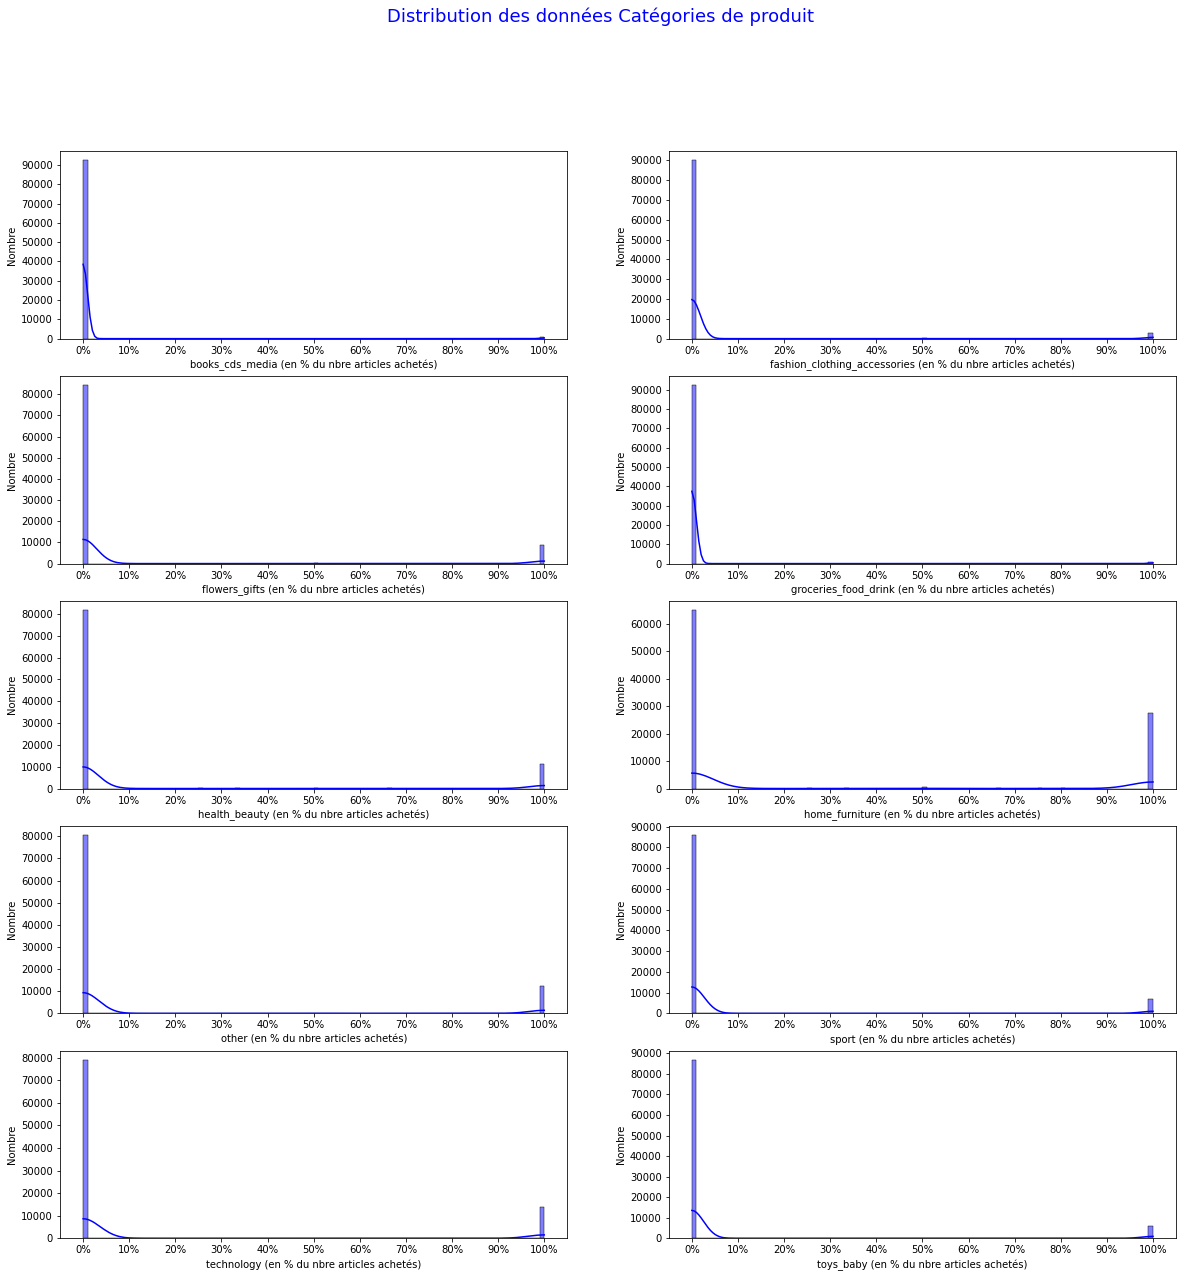

In [97]:
# Liste variables catégorie produit - Ligne 1
liste_categ_prod_1 = ['books_cds_media', 'fashion_clothing_accessories']
liste_categ_prod_2 = ['flowers_gifts', 'groceries_food_drink']
liste_categ_prod_3 = ['health_beauty', 'home_furniture']
liste_categ_prod_4 = ['other', 'sport']
liste_categ_prod_5 = ['technology', 'toys_baby']

# Appel de la fonction pourl'affichage de la distribution des catégories de produit
affich_histplot_catprod(df_data_orders_customers_outliers, liste_categ_prod_1, liste_categ_prod_2, liste_categ_prod_3,
                        liste_categ_prod_4, liste_categ_prod_5, 'Distribution des données Catégories de produit',
                        100, kde=True, discrete=False)

On remarque que le panier moyen  du client est composée souvent d'une seule catégorie de produit et que les catégories de produit les plus achetées sont les fournitures de bureau, les produits de santé/beauté et les produits technologiques.

Pas de valeurs atypiques.

### 9.1.10 Variable "total_items" (nombre total d'articles achetés par le client)

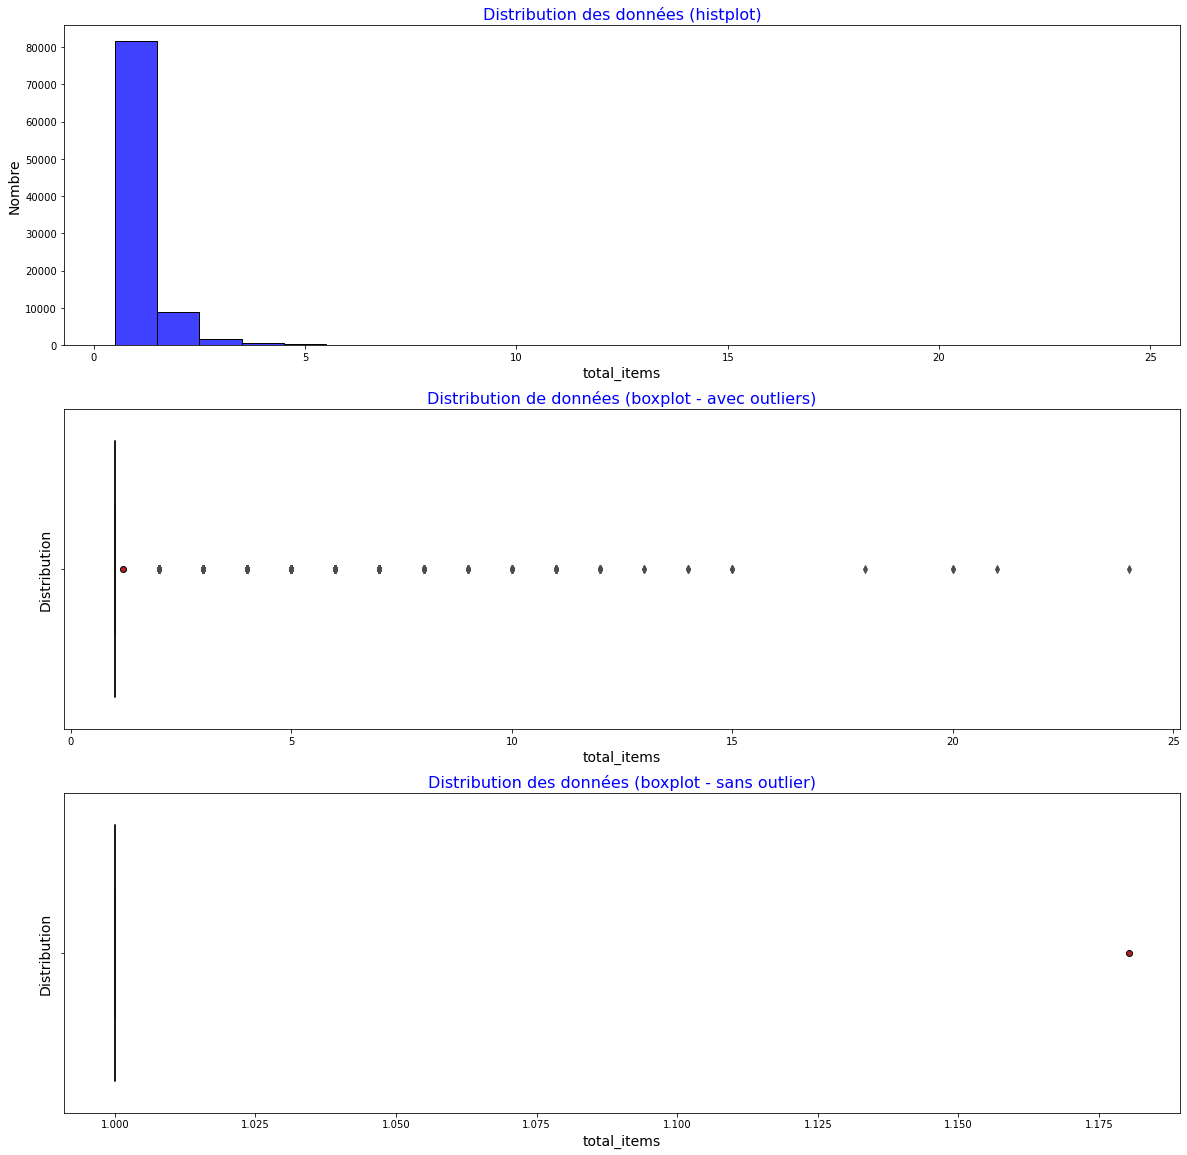

In [98]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'total_items', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 25, kde=False, discrete=True)

Distribution dissymétrique à gauche.

Les clients achètent rarement plus d'un article, et jusqu'à 5 articles.

Pas de traitement particulier pour les valeurs atypiques.

### 9.1.11 Variable "mean_nb_items" (nombre moyen d'articles achetés par le client)

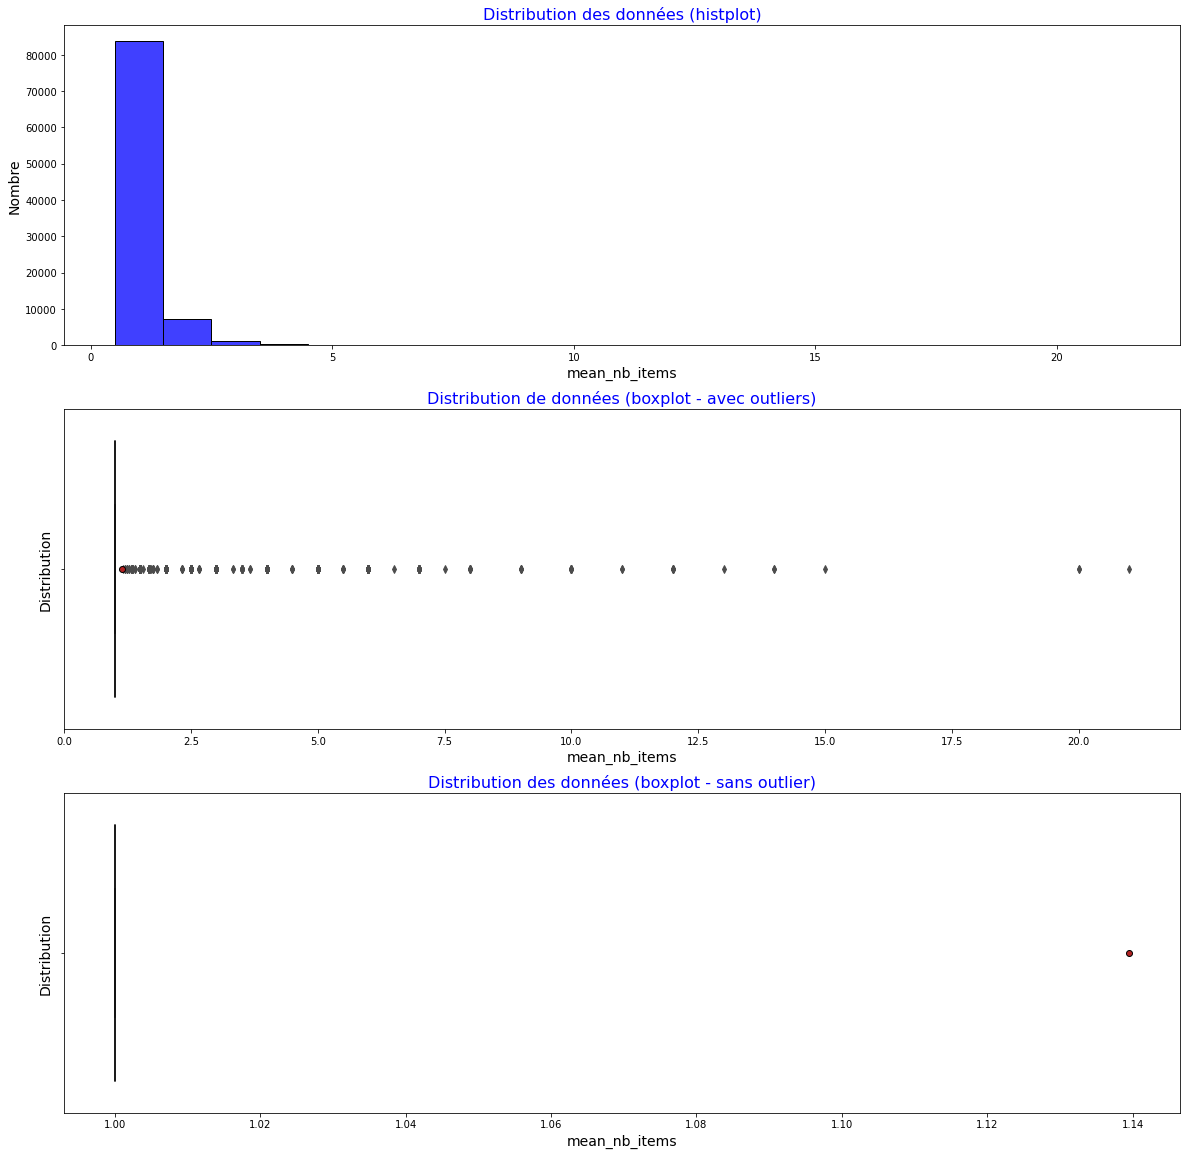

In [99]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'mean_nb_items', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 25, kde=False, discrete=True)

Distribution dissymétrique à gauche.

Les clients achètent rarement plus d'un article, et jusqu'à 4 articles.

Pas de traitement particulier pour les valeurs atypiques.

### 9.1.12 Variable "order_mean_delay" (délai moyen d'achat du client)

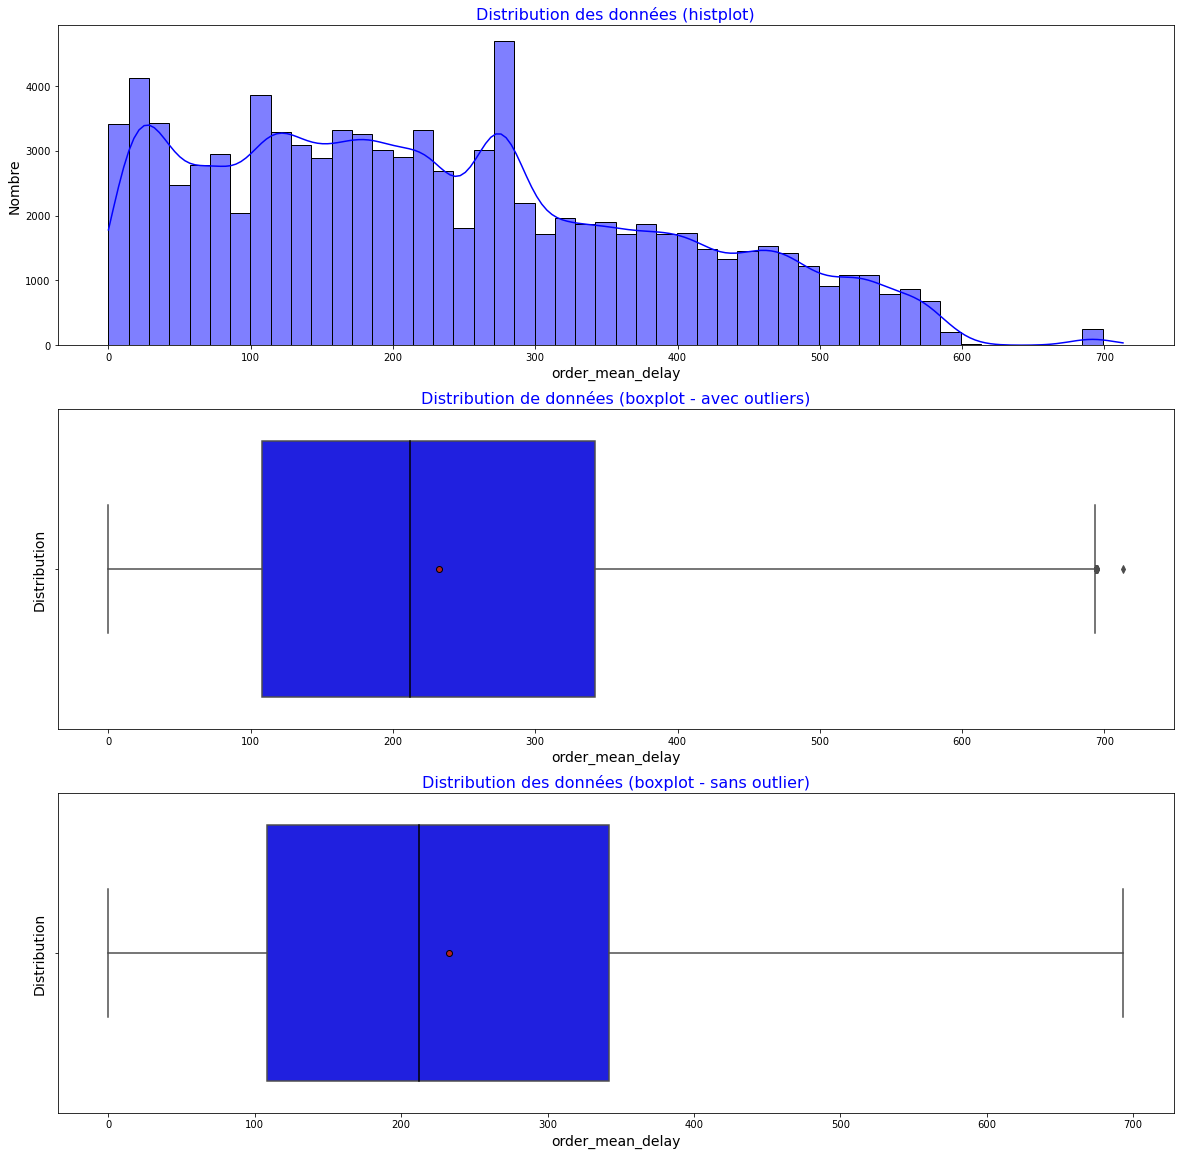

In [100]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'order_mean_delay', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 50, kde=True, discrete=False)

Distribution légérement dissymétrique à gauche, avec une distribution relativement homogène des données.

Les clients sont représentés sur les différents segments clientèle (clients fidèles, clients en sommeil,...).

Pas de traitement particulier pour les valeurs atypiques (ex: délai d'achat de plus de 700 jours => client perdu) .

### 9.1.13 Variable "freight_ratio" (ratio des frais de livraison, exprimé en %)

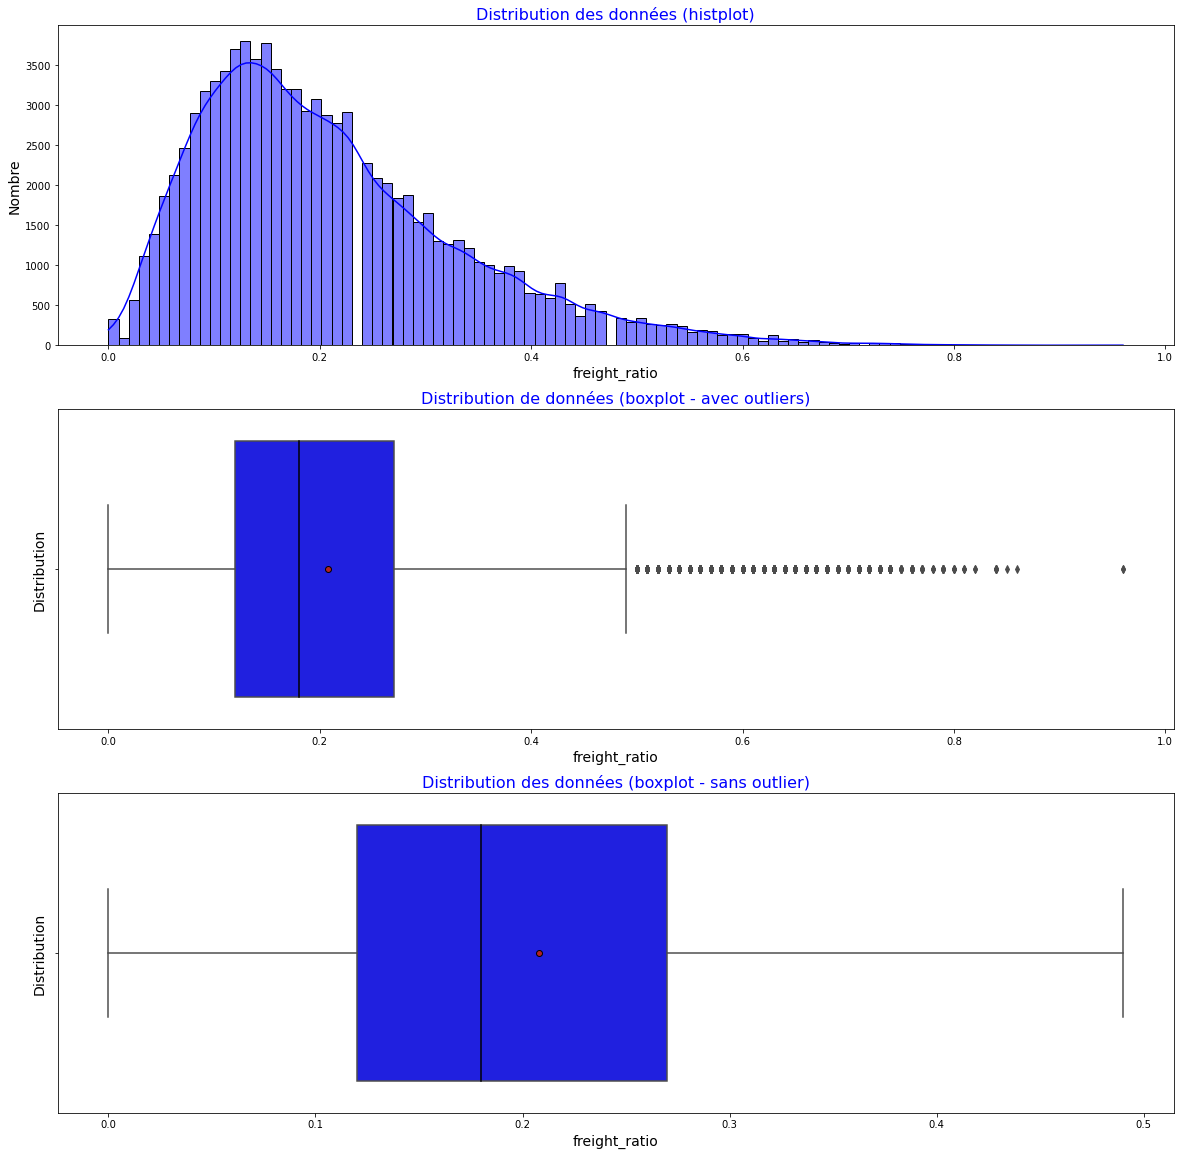

In [101]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'freight_ratio', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 100, kde=True, discrete=False)

Distribution quasi normale des données.

Le taux moyen de frais de livraion est de moins de 20 %.

Pas de traitement particulier pour les valeurs atypiques (ex: frais de livraion représentant plus de 90% de la dépense d'achat) .

### 9.1.14 Variable "mean_price_order" (montant moyen dépensé par le client)

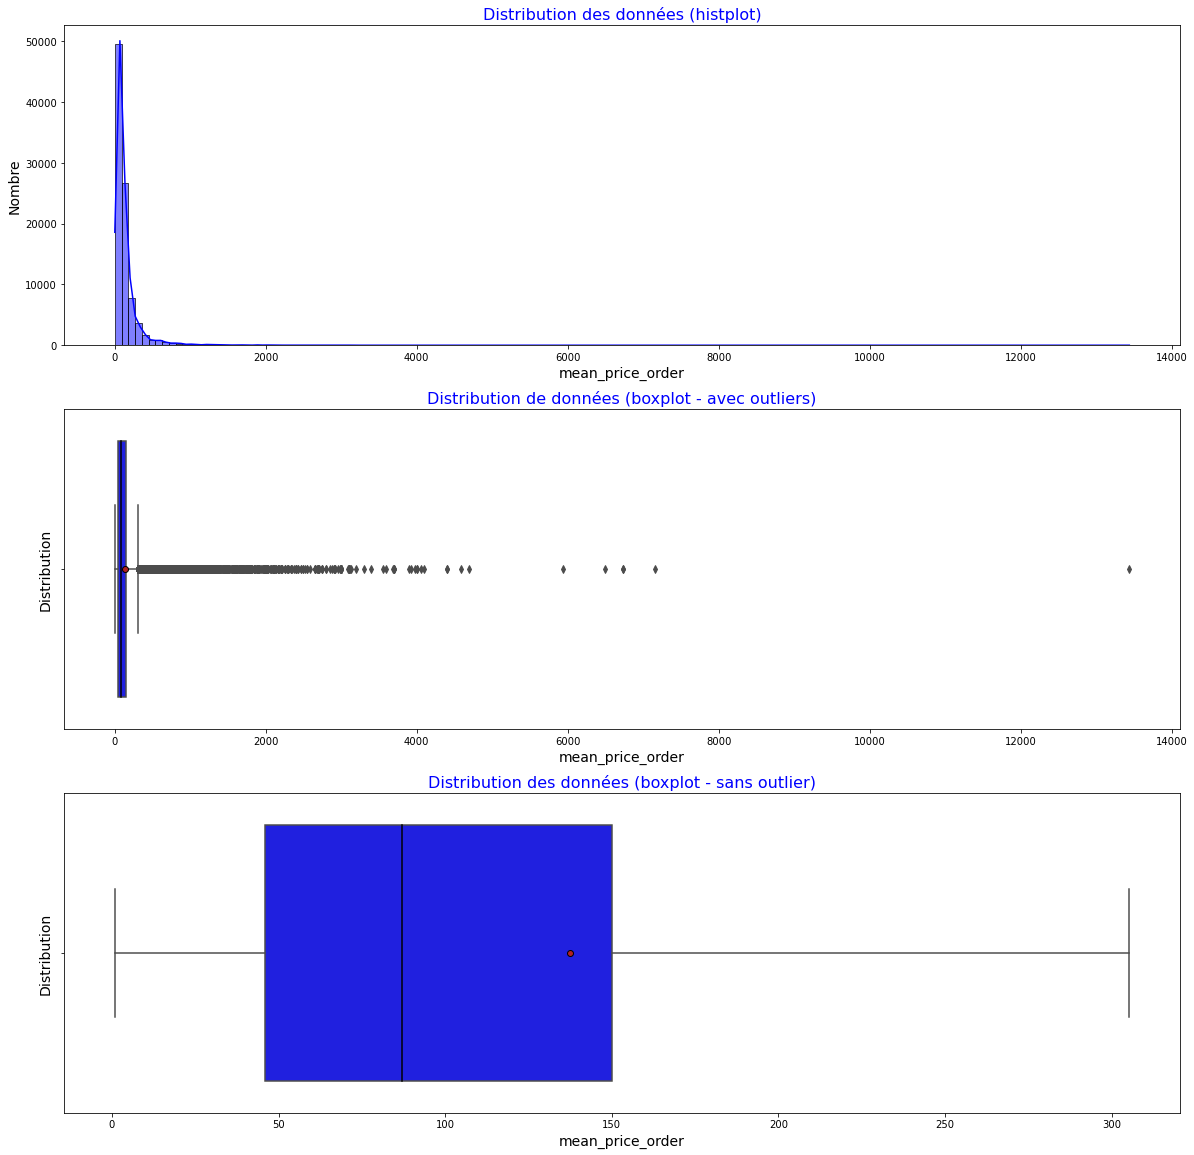

In [102]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'mean_price_order', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 150, kde=True, discrete=False)

Distribution dissymétrique à gauche.

Les clients dépensent en général, des montants moyens d'achats assez faibles (moins de 150 unités monétaires) sur le site Olist.

Il y a certaines valeurs atypiques, comme une dépense moyenne de plus de 13000 unités monétaires.
Nous éliminerons les valeurs atypiques sur cette variable, par la méthode des inter-quartiles.

### 9.1.15 Variable "harvesine_distance" (localisation du client par rapport au site Olist)

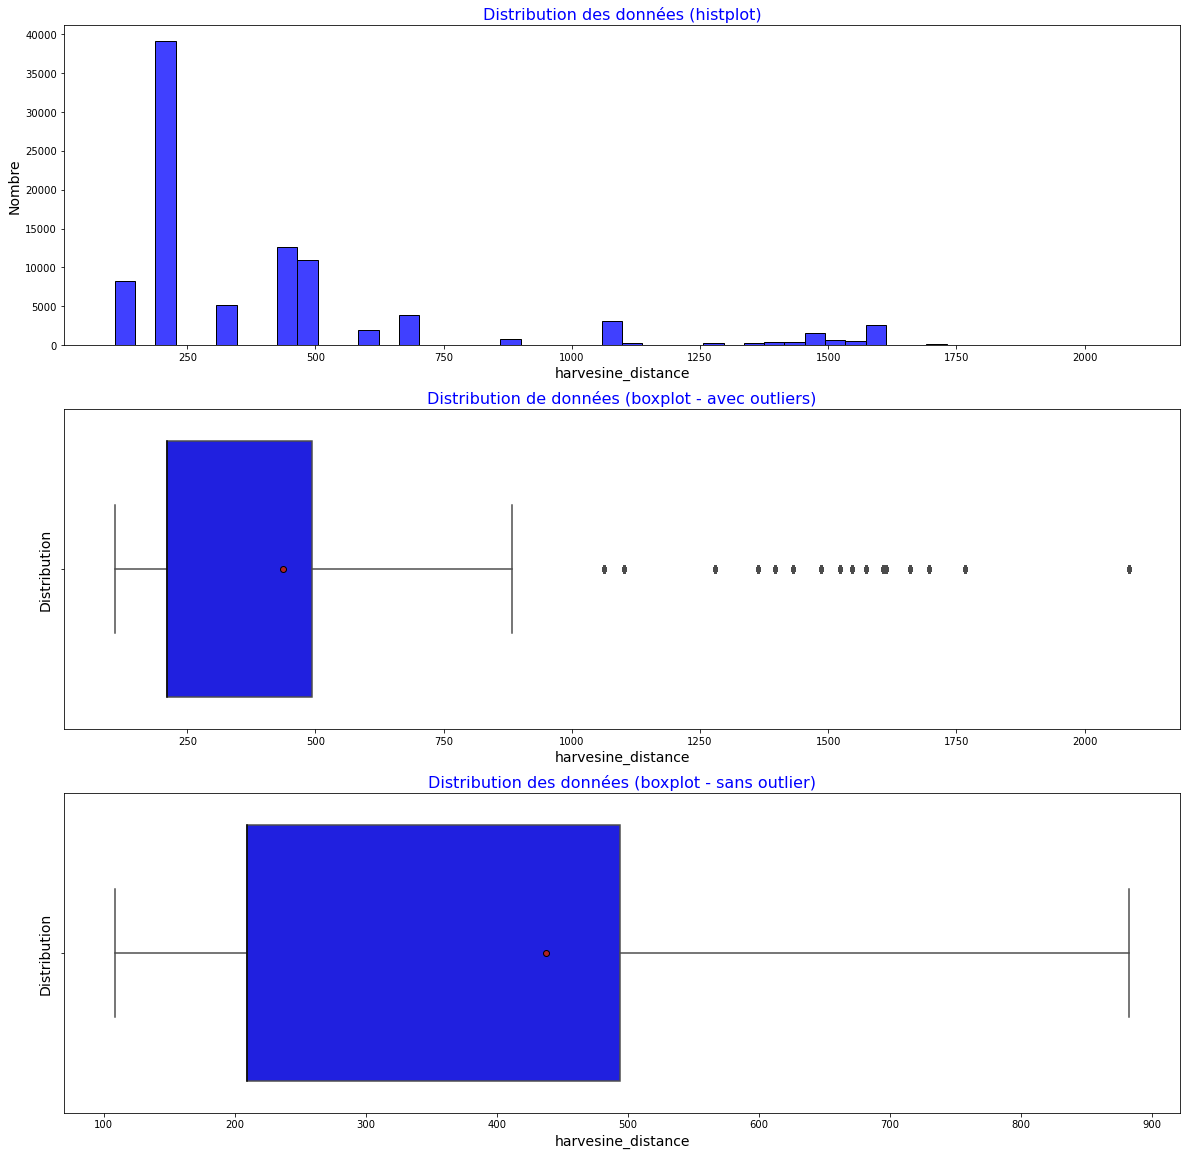

In [103]:
# Appel de la fonction pour l'affichage de la distribution et des boxplots
affich_histplot_boxplot(df_data_orders_customers_outliers, 'harvesine_distance', 'Distribution des données (histplot)',
                         'Distribution de données (boxplot - avec outliers)',
                         'Distribution des données (boxplot - sans outlier)', 50, kde=False, discrete=False)

Distribution peu homogène des données.

Les clients sont en général assez près du site de Olist.

Pas de traitement particulier des valeurs atypiques.

## 9.2 Analyse univariée des variables qualitatives

In [104]:
# Définitions générales pour l'affichage des graphiques
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

### 9.2.1 Représentation des états brésiliens dans les commandes client

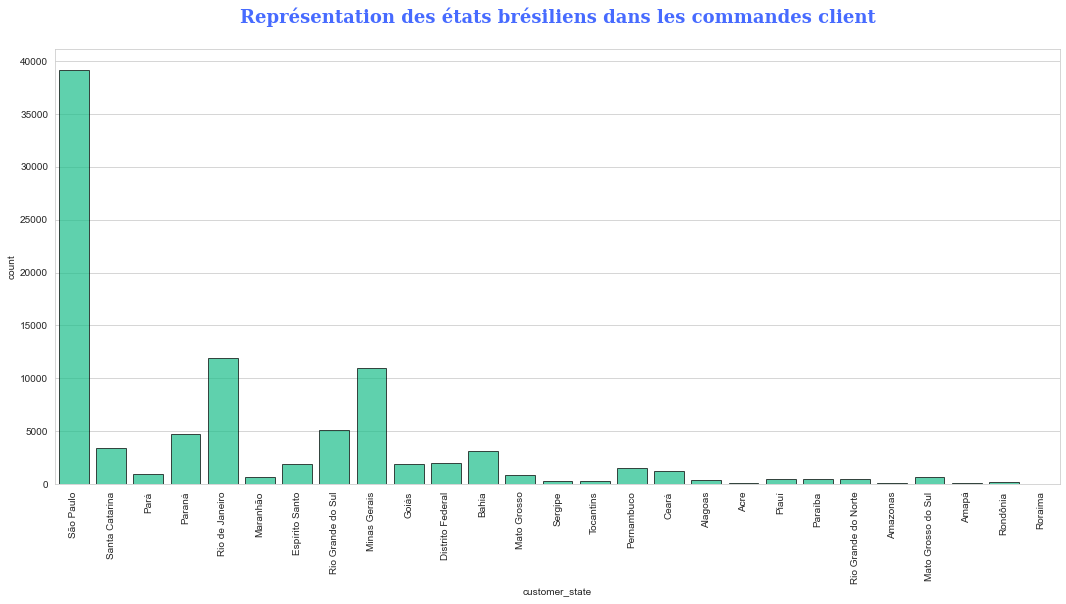

In [105]:
# Affichage de la représentation des différents états brésiliens
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df_data_orders_customers_outliers, x="customer_state",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, df_data_orders_customers_outliers["customer_state"].nunique()),
           df_data_orders_customers_outliers["customer_state"].unique(),
           rotation=90)
plt.title(f"Représentation des états brésiliens dans les commandes client\n",
          fontdict=font_title)
plt.show()

## 9.3 Suppression des valeurs atypiques par méthode inter-quartiles

Suppression des valeurs atypiques pour les variables "total_spend", "mean_delivery_days", "mean_price_order" par la méthode inter-quartile.

In [106]:
# Appel de la fonction pour détecter les valeurs atypiques par la méthode inter-quartiles
# pour les variables "total_spend", "mean_delivery_days", "mean_price_order"
liste_col = ['total_spend', 'mean_delivery_days', 'mean_price_order']

# Appel de la fonction pour détecter les valeurs atypiques par méthode inter-quartiles
valatyp_to_drop = detect_outliers_iqr(df_data_orders_customers_ml, 1, liste_col)

print('nombre de lignes à supprimer: ' + str(len(valatyp_to_drop)))

nombre de lignes à supprimer: 1116


In [107]:
df_data_orders_customers_ml = df_data_orders_customers_ml.drop(valatyp_to_drop)
print_proportion_nan(df_data_orders_customers_ml)

Proportion de NaN : 0.0 %, Taille du jeu de données : (92234, 30)



## 9.4 Analyse multivariée

### 9.4.1 Matrice des corrélations

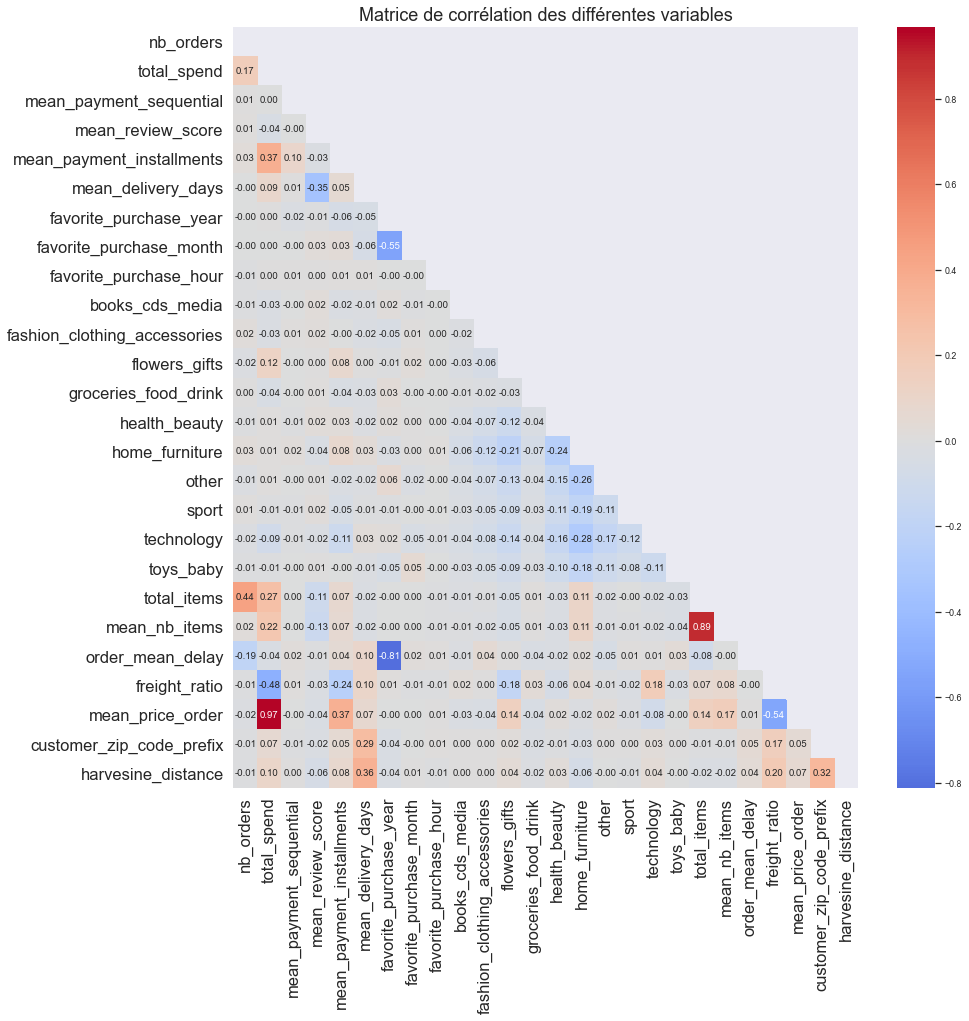

In [108]:
# Sélection des variables numériques du dataset
df_data_orders_customers_outliers_num = df_data_orders_customers_ml.select_dtypes(include='number')

# Calcul et affichage matrice de corrélation
corr_matrix = df_data_orders_customers_outliers_num.corr()

masque = np.zeros_like(corr_matrix)
masque[np.triu_indices_from(masque)] = True

fig = plt.figure(1, figsize=(14,14))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation des différentes variables')
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=masque, fmt=".2f", center=0)
plt.show()

Il y a très peu de variables très corrélées, à l'exception des variables suivantes:
- les variables "mean_price_order" et "total_spend" sont très fortements corrélées (corr = 0,97). La variable "total_spend" sera supprimée.

- les variables "mean_nb_items" et "total_items" sont aussi fortement corrélées (corr = 0,89). La variable "total_items" sera supprimée.

- la variable "order_mean_delay" et "favorite_purchase_year" sont très corrélées (corr = -0,81). La variable "favorite_purchase_year" sera supprimée.

In [109]:
# Suppression des variables "total_spend", "total_items", "favorite_purchase_year"
df_data_orders_customers_ml.drop(['total_spend', 'total_items', 'favorite_purchase_year'], axis=1, inplace=True)

In [110]:
# Sauvegarde du dataset client pour modélidation non supervisée
df_data_orders_customers_ml.to_csv('./Input/df_ml_data_customer.csv', index=False)

In [111]:
df_data_orders_customers_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92234 entries, 0 to 93349
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_unique_id            92234 non-null  object 
 1   nb_orders                     92234 non-null  int64  
 2   mean_payment_sequential       92234 non-null  float64
 3   mean_review_score             92234 non-null  float64
 4   mean_payment_installments     92234 non-null  float64
 5   mean_delivery_days            92234 non-null  float64
 6   favorite_purchase_month       92234 non-null  int64  
 7   favorite_purchase_hour        92234 non-null  int64  
 8   books_cds_media               92234 non-null  float64
 9   fashion_clothing_accessories  92234 non-null  float64
 10  flowers_gifts                 92234 non-null  float64
 11  groceries_food_drink          92234 non-null  float64
 12  health_beauty                 92234 non-null  float64
 13  h

In [112]:
df_data_orders_customers_ml.head(3)

,customer_unique_id,nb_orders,mean_payment_sequential,mean_review_score,mean_payment_installments,mean_delivery_days,favorite_purchase_month,favorite_purchase_hour,books_cds_media,fashion_clothing_accessories,...,toys_baby,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,customer_zip_code_prefix,customer_city,customer_state,Flag and name,harvesine_distance
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,5.0,8.0,6.0,5,10,0.0,0.0,...,0.0,1.0,111.0,0.08,129.9,7787,cajamar,São Paulo,São Paulo,209.713834
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,4.0,1.0,3.0,5,11,0.0,0.0,...,0.0,1.0,114.0,0.30,18.9,6053,osasco,São Paulo,São Paulo,209.713834
2,0000f46a3911fa3c0805444483337064,1,1.0,3.0,8.0,26.0,3,21,0.0,0.0,...,0.0,1.0,537.0,0.20,69.0,88115,sao jose,Santa Catarina,Santa Catarina,125.363853
